In [1]:
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter
files = glob.glob('/home/anis/summer2020-Data/processed/search+youtube_v2/*.csv')


/home/anis/anaconda3/envs/mycondaenv/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/home/anis/anaconda3/envs/mycondaenv/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


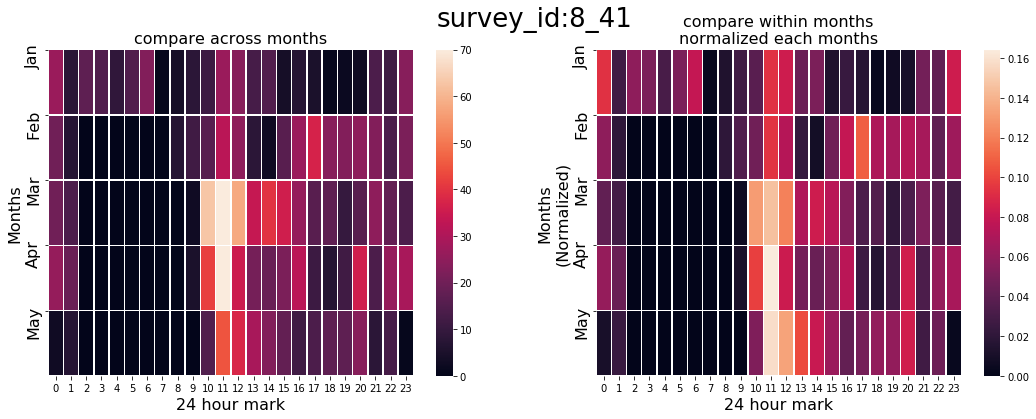

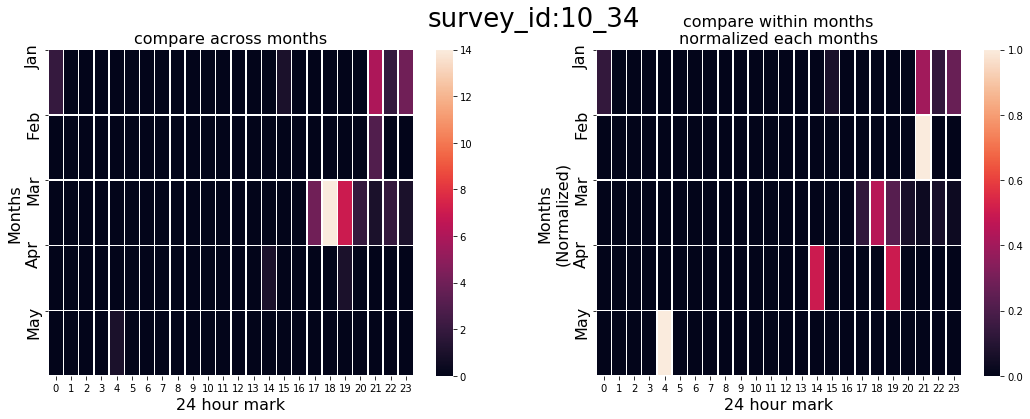

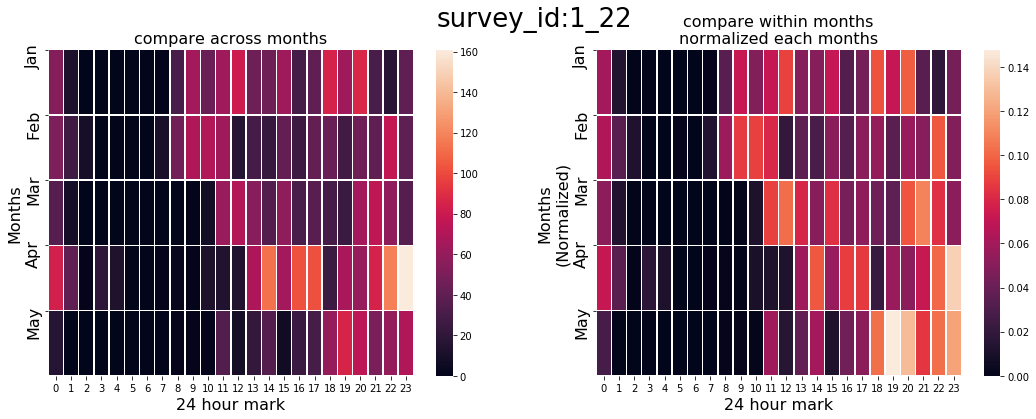

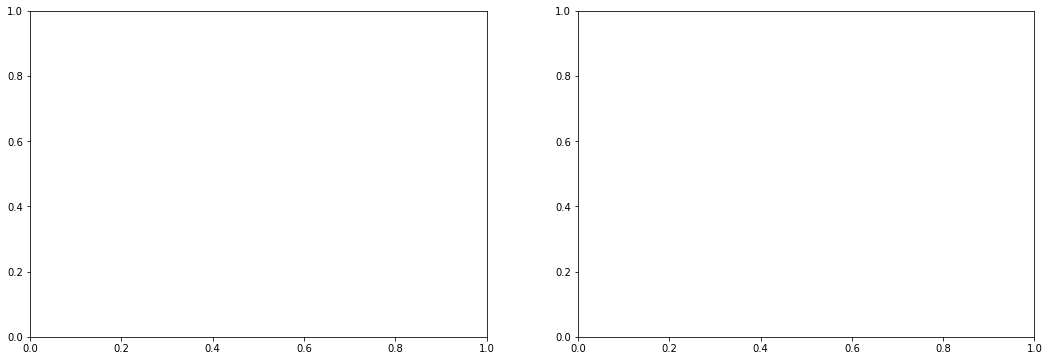

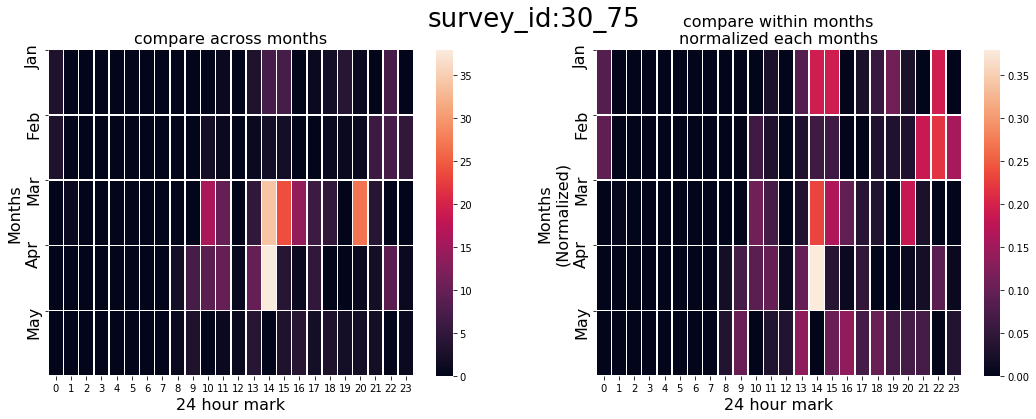

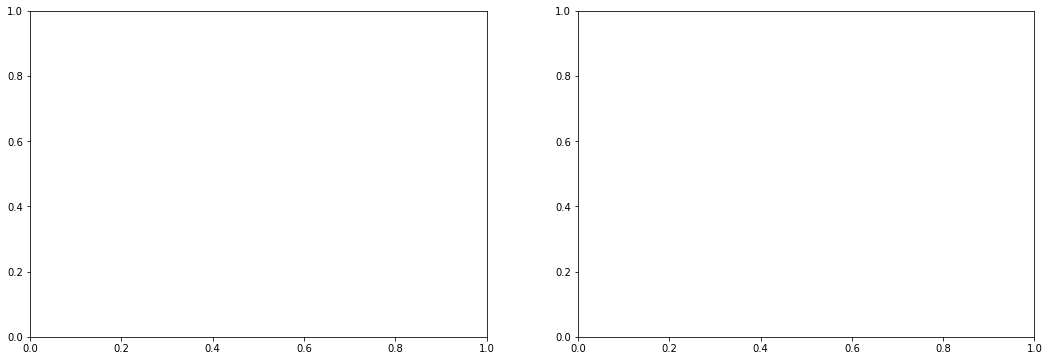

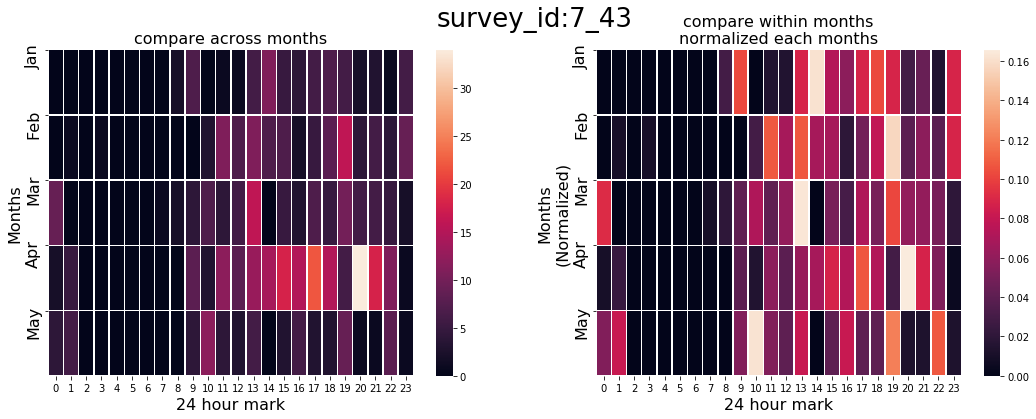

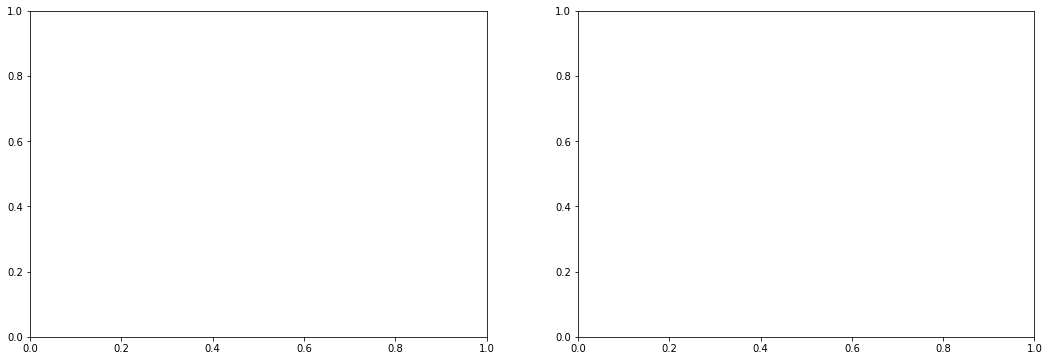

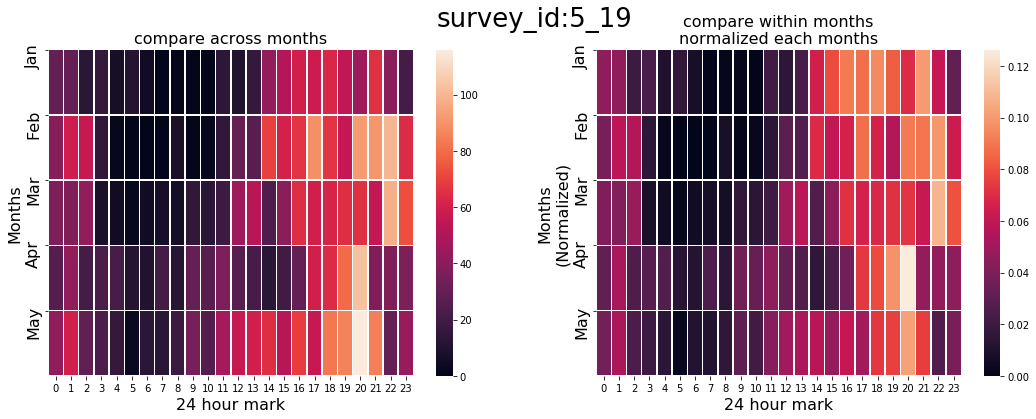

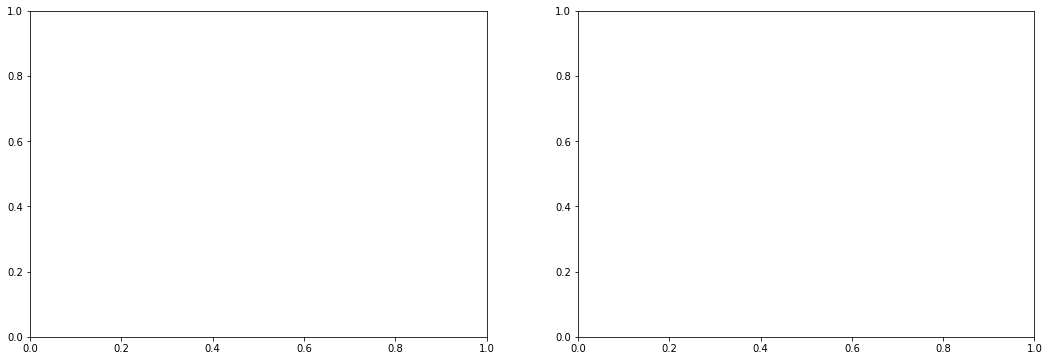

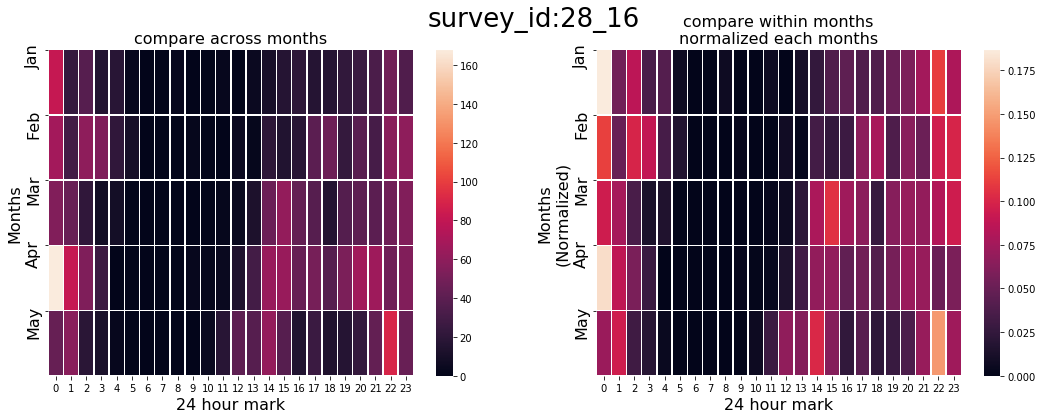

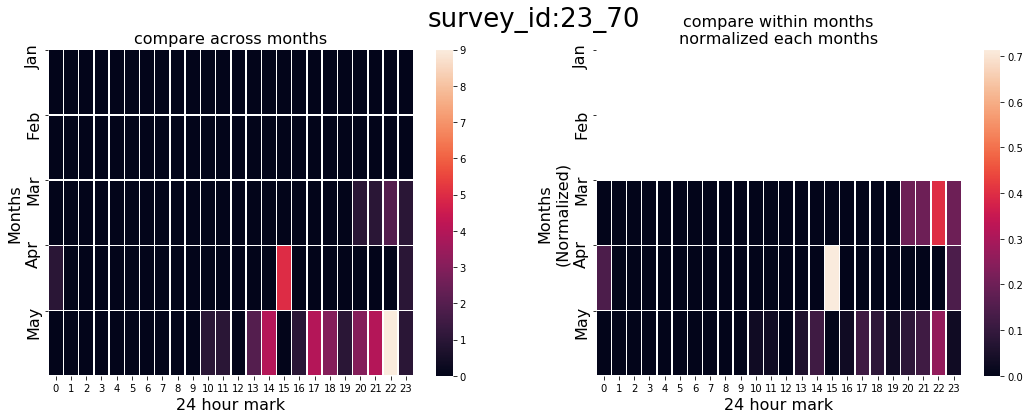

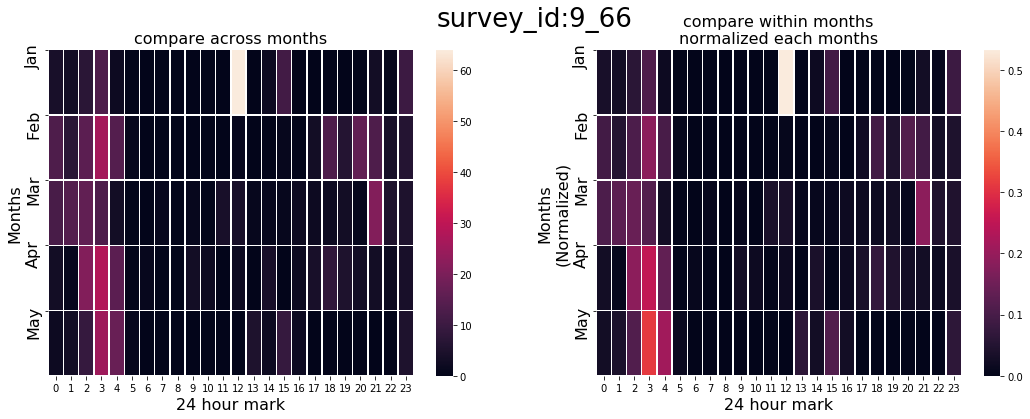

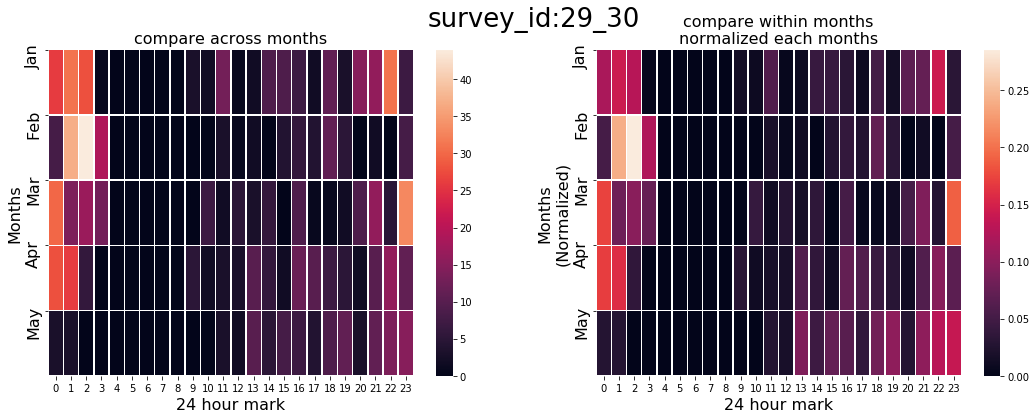

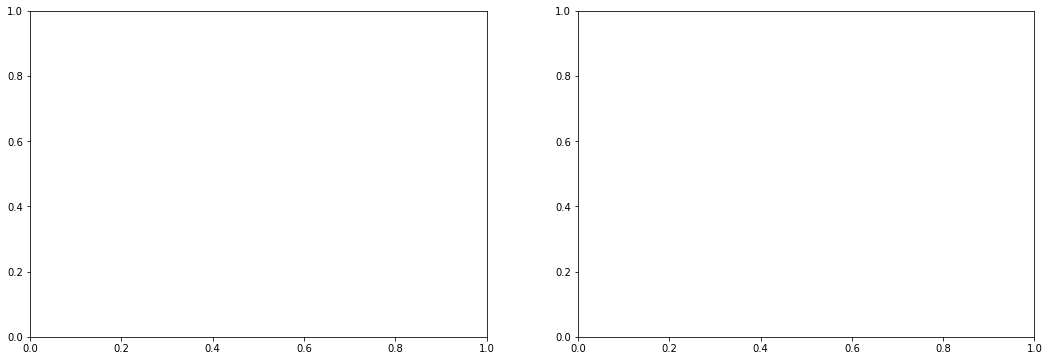

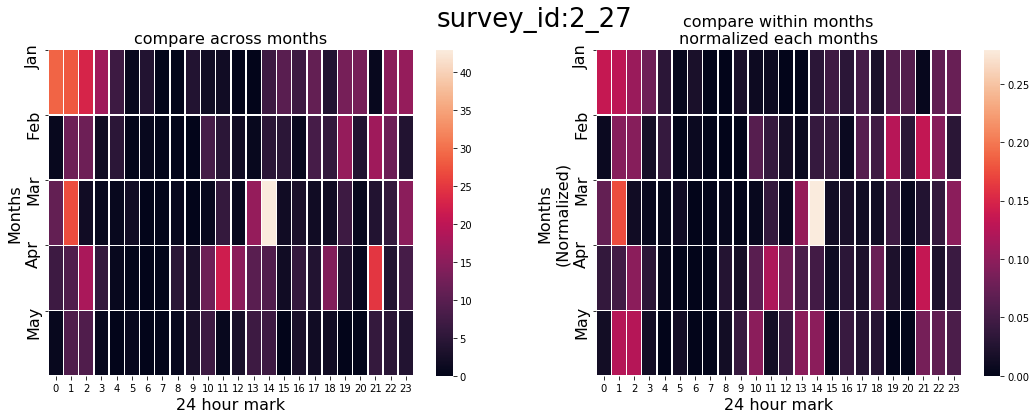

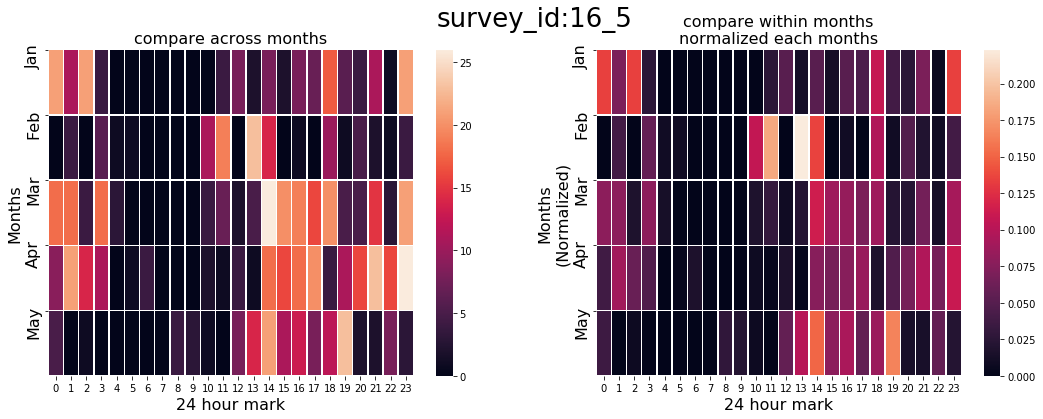

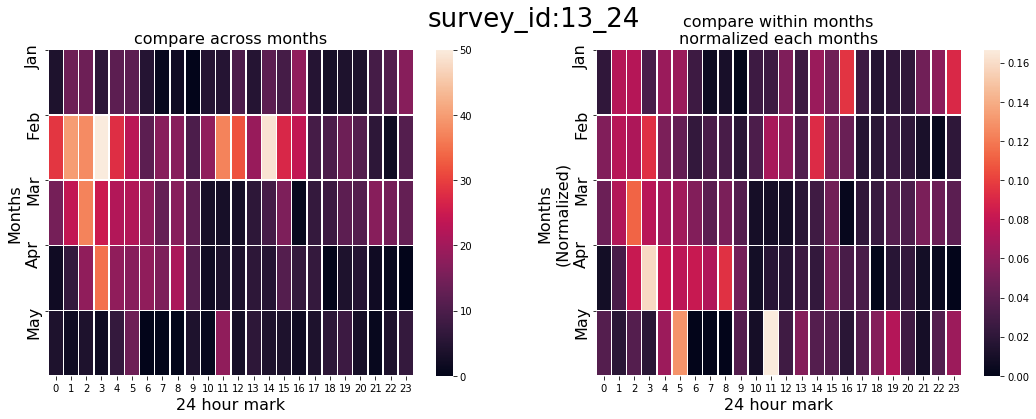

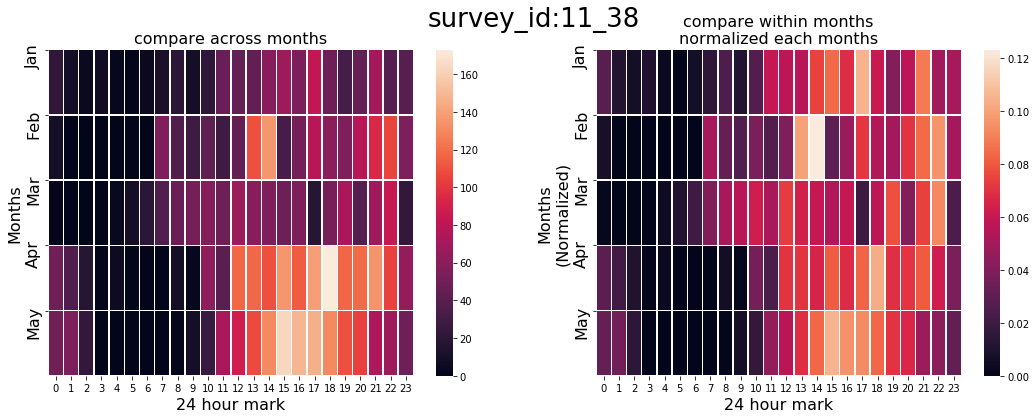

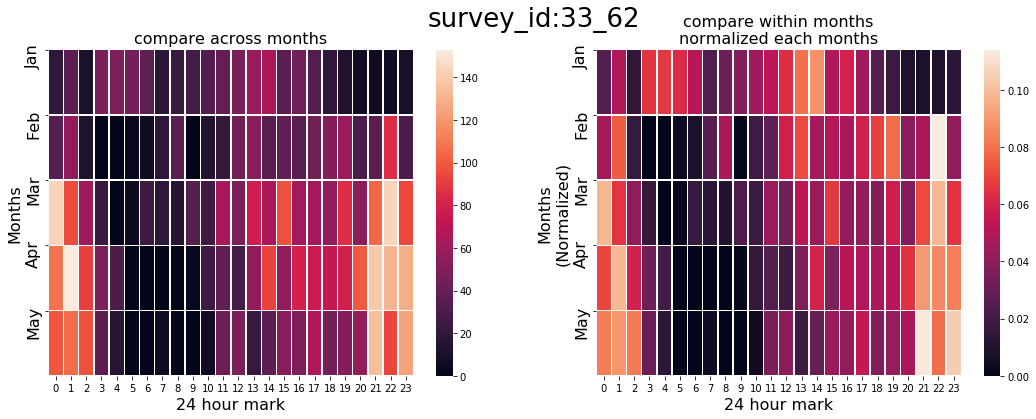

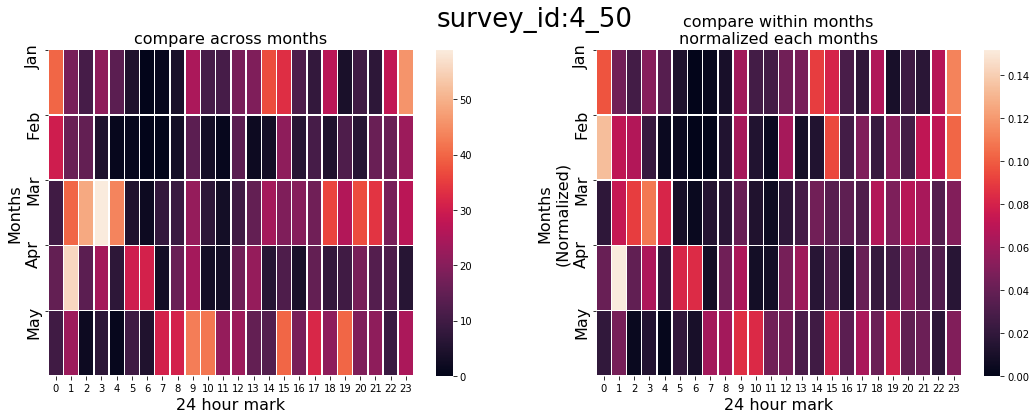

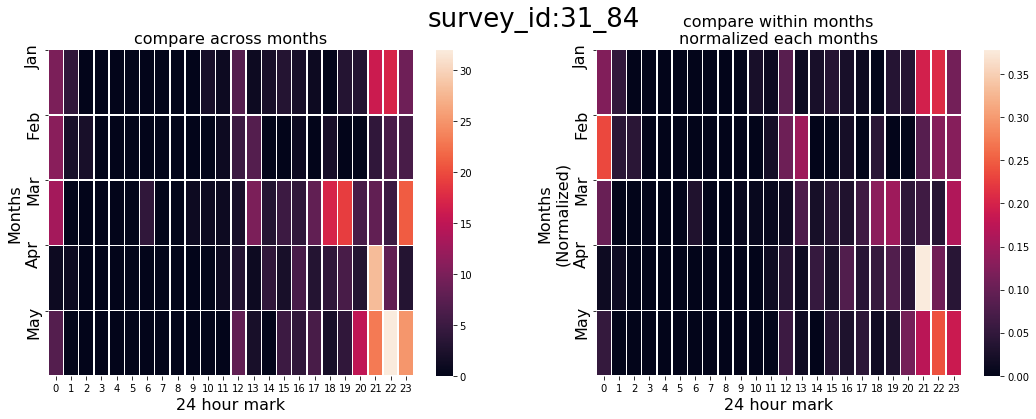

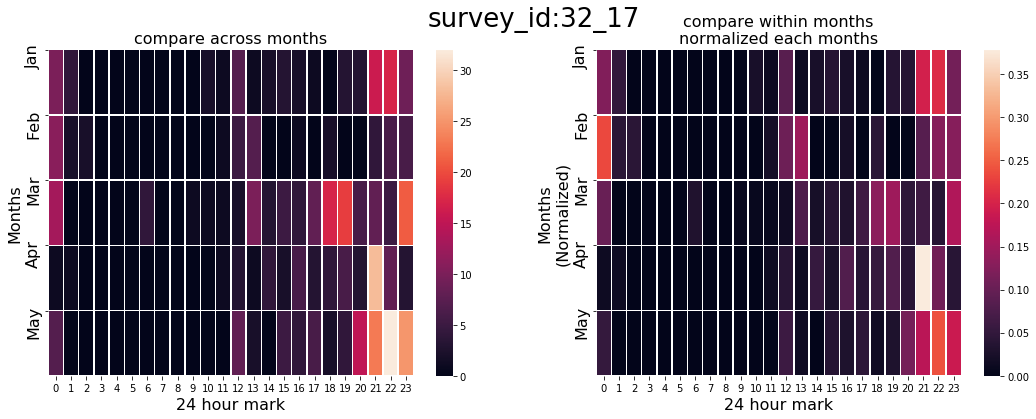

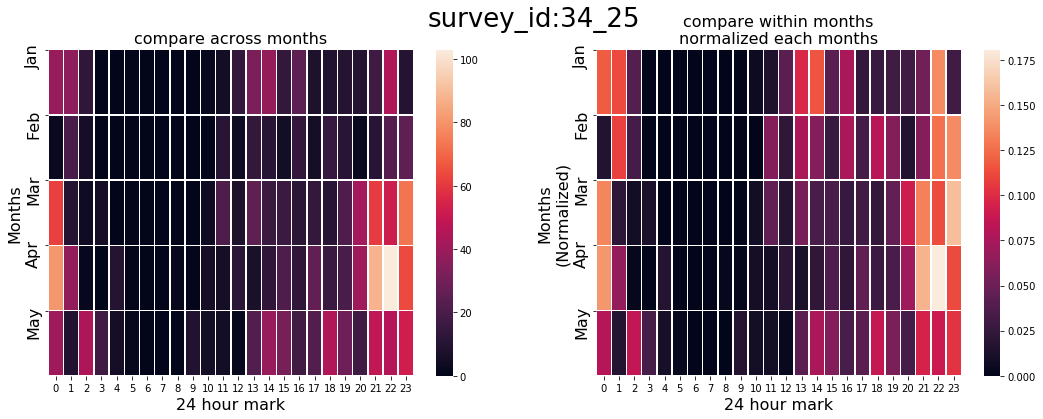

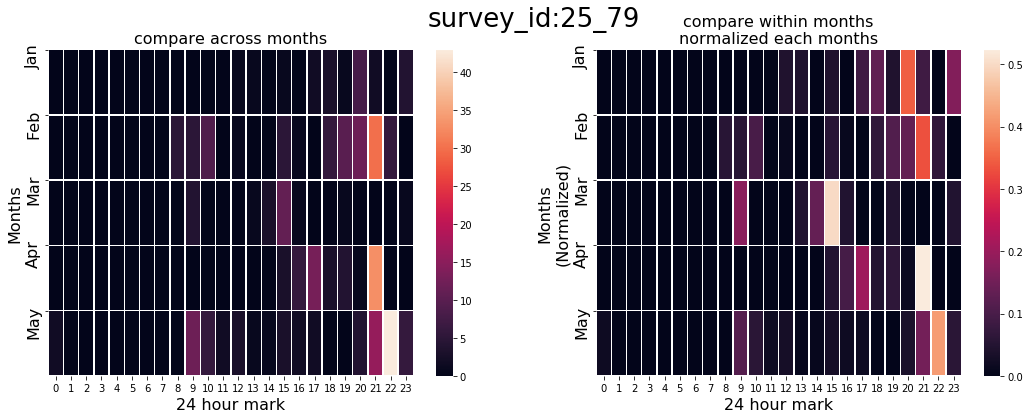

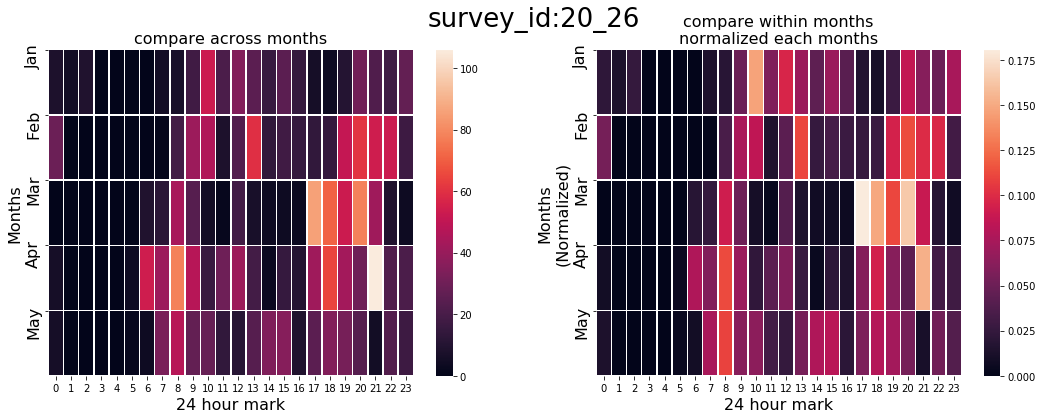

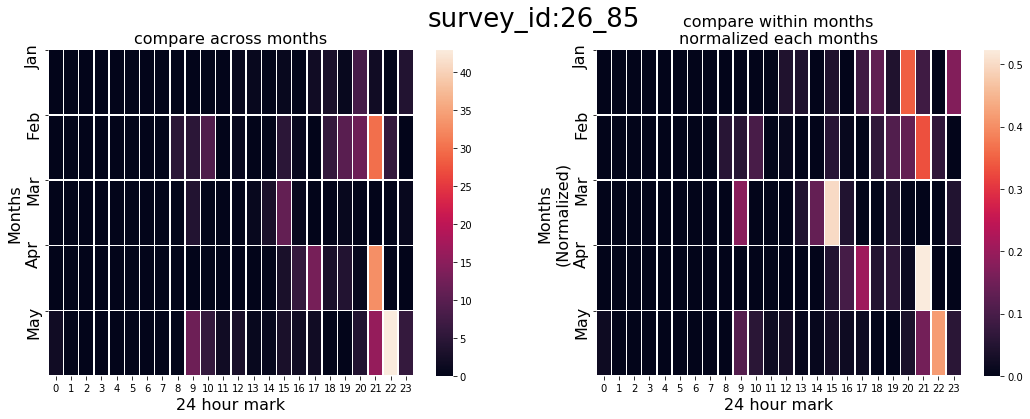

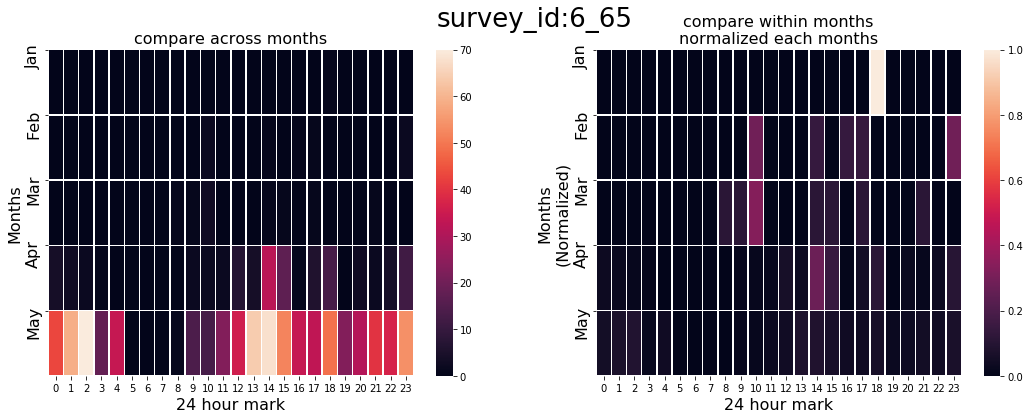

In [2]:
for f in files:
    id_ = f.split('/')[-1].split('.')[0]
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df_jan = df[(df.years == 2020) & (df.months == 1)]
    df_feb = df[(df.years == 2020) & (df.months == 2)]
    df_march = df[(df.years == 2020) & (df.months == 3)]
    df_april = df[(df.years == 2020) & (df.months == 4)]
    df_may = df[(df.years == 2020) & (df.months == 5)]
    df_june = df[(df.years == 2020) & (df.months == 6)]

    df_2020_weekend_events = df[df.weekdays >= 5]
    df_2020_weekday_events = df[df.weekdays < 5]
    
    
    hrly_youtube_activities = []
    categories = set()
    for mdf in [df_jan,df_feb,df_march,df_april,df_may]:
        youtubedf = mdf[mdf.source=='youtube']
        vector = [0.0 for i in range(24)]
        for hr,count in youtubedf.hours.value_counts().sort_index().to_dict().items():
            vector[hr]+=count
        #print(vector)
        hrly_youtube_activities.append(vector)
#         print(youtubedf.categories.value_counts())
        
#         for name,count in youtubedf.categories.value_counts().to_dict().item():
            
    
    f, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    hrly_youtube_activities = np.array(hrly_youtube_activities)
    #hrly_youtube_activities = np.where(hrly_youtube_activities==0, 1, hrly_youtube_activities) 
    if hrly_youtube_activities.sum() > 0:
    #     plt.figure(figsize=(12, 6))
        sns.heatmap(hrly_youtube_activities,linewidths=.5,ax=axes[0])
        axes[0].set_xlabel('24 hour mark', fontsize=16)
        axes[0].set_ylabel('Months', fontsize=16)
        axes[0].set_yticks([0,1,2,3,4])
        axes[0].set_yticklabels(['Jan','Feb','Mar','Apr','May'], fontsize=16)
        axes[0].set_title('compare across months', fontsize=16)

        normalized_hrly_youtube_activities = hrly_youtube_activities/hrly_youtube_activities.sum(axis=1)[:,None]
        sns.heatmap(normalized_hrly_youtube_activities,linewidths=.5,ax=axes[1])
        axes[1].set_xlabel('24 hour mark', fontsize=16)
        axes[1].set_ylabel('Months\n(Normalized)', fontsize=16)
        axes[1].set_yticks([0,1,2,3,4])
        axes[1].set_yticklabels(['Jan','Feb','Mar','Apr','May'], fontsize=16)
        axes[1].set_title('compare within months\nnormalized each months', fontsize=16)
        f.suptitle('survey_id:'+str(id_),fontsize=26)


# Now look at categories

In [3]:
import ast
categories = set()
for f in files:
    id_ = f.split('/')[-1].split('.')[0]
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df_jan = df[(df.years == 2020) & (df.months == 1)]
    df_feb = df[(df.years == 2020) & (df.months == 2)]
    df_march = df[(df.years == 2020) & (df.months == 3)]
    df_april = df[(df.years == 2020) & (df.months == 4)]
    df_may = df[(df.years == 2020) & (df.months == 5)]
    df_june = df[(df.years == 2020) & (df.months == 6)]

    df_2020_weekend_events = df[df.weekdays >= 5]
    df_2020_weekday_events = df[df.weekdays < 5]
        
    for mdf in [df_jan,df_feb,df_march,df_april,df_may]:
        youtubedf = mdf[mdf.source=='youtube']
        for cat_name,count in youtubedf.categories.value_counts().sort_index().to_dict().items():
            cat = ast.literal_eval(cat_name)[0]
            categories.add(cat)
categories = list(categories)
categories_index = [i for i in range(len(categories))]
name_to_index = {}
for i, name in enumerate(categories):
    name_to_index[name] = i

/home/anis/anaconda3/envs/mycondaenv/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide
/home/anis/anaconda3/envs/mycondaenv/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


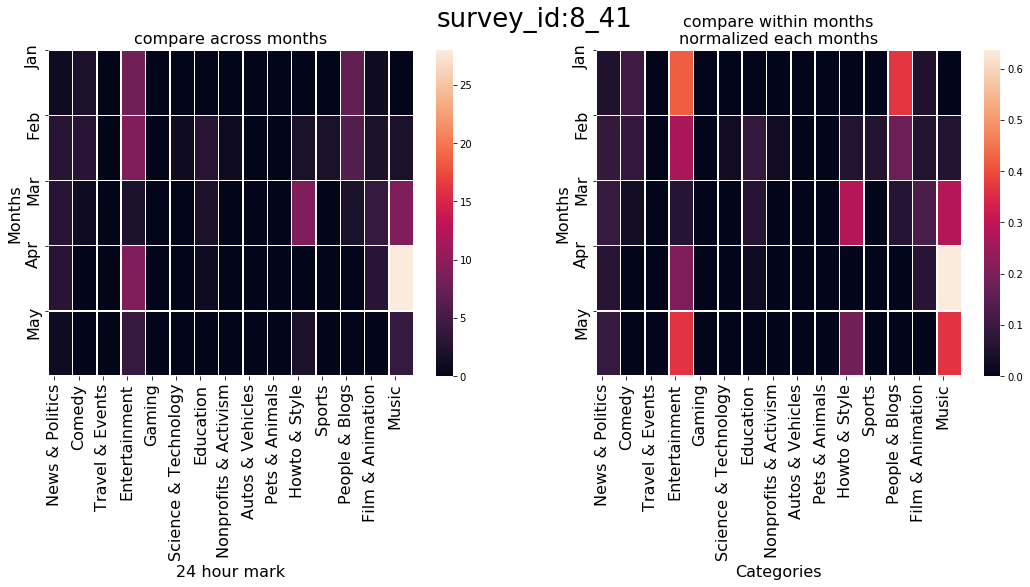

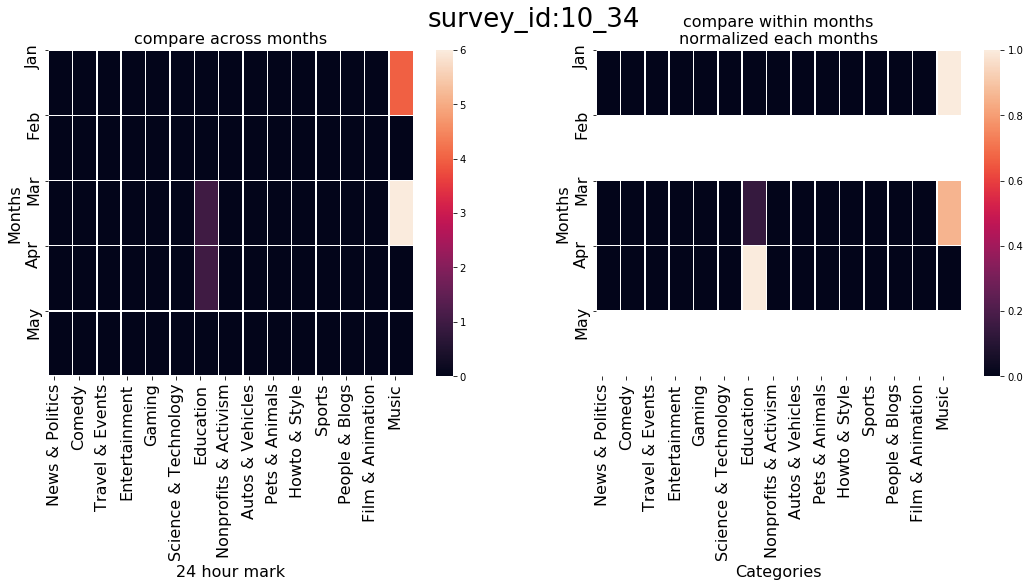

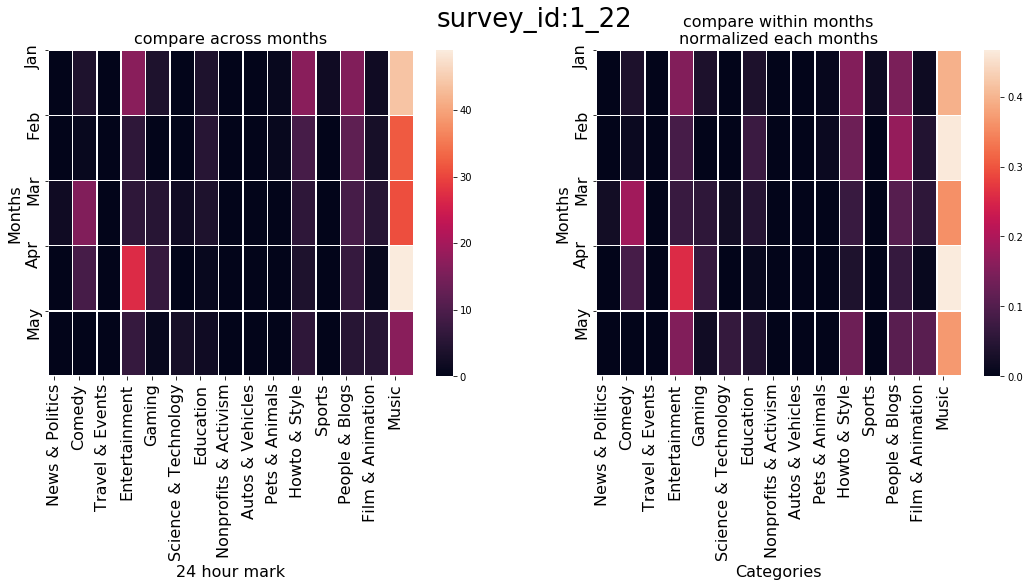

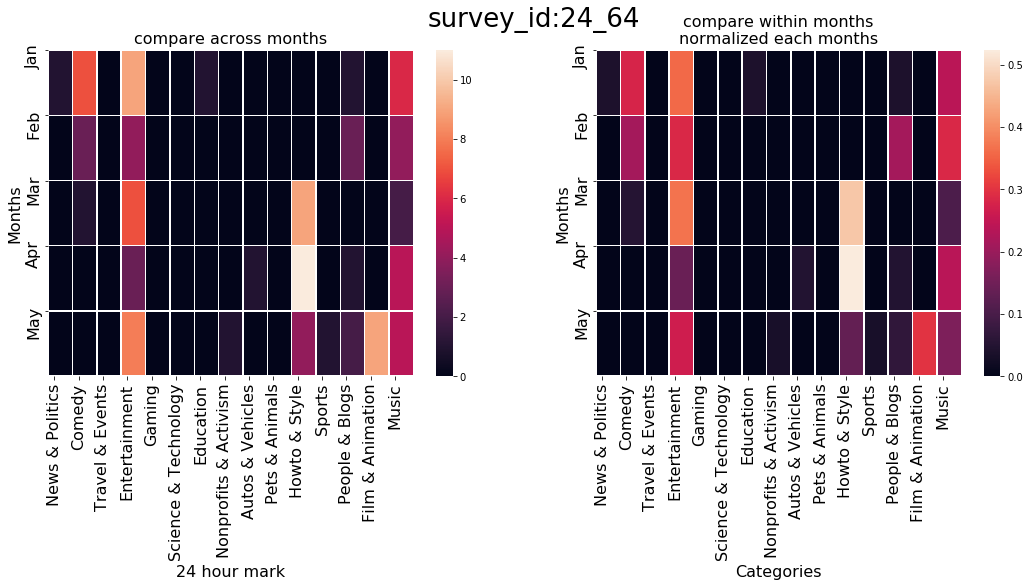

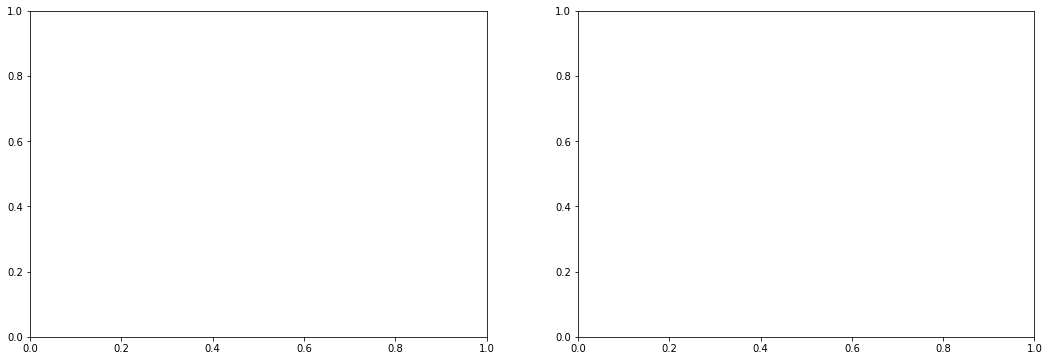

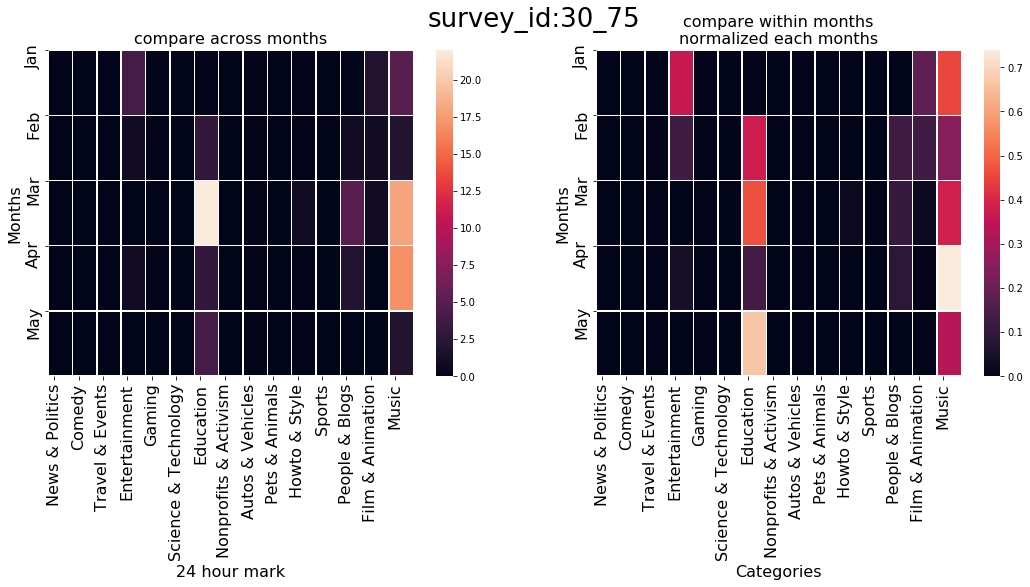

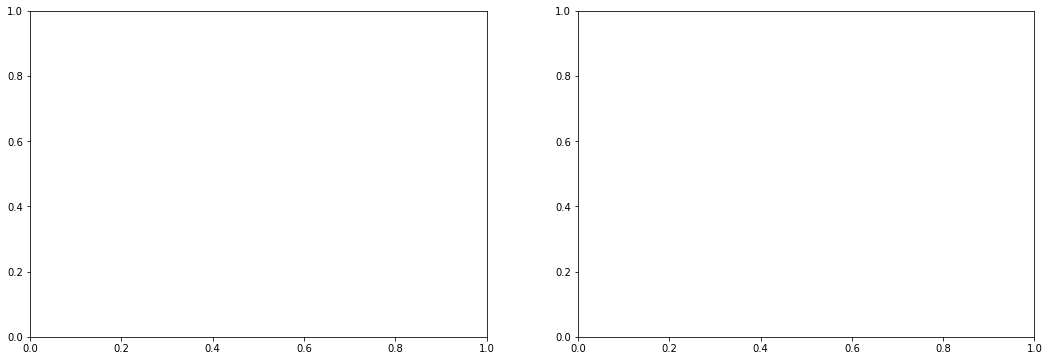

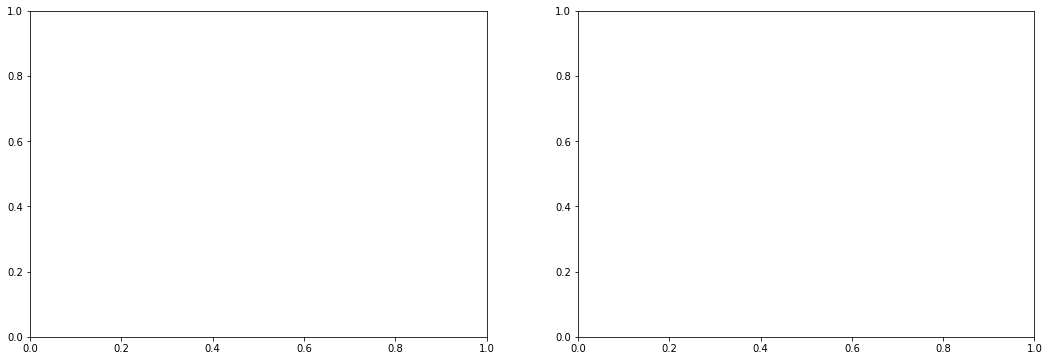

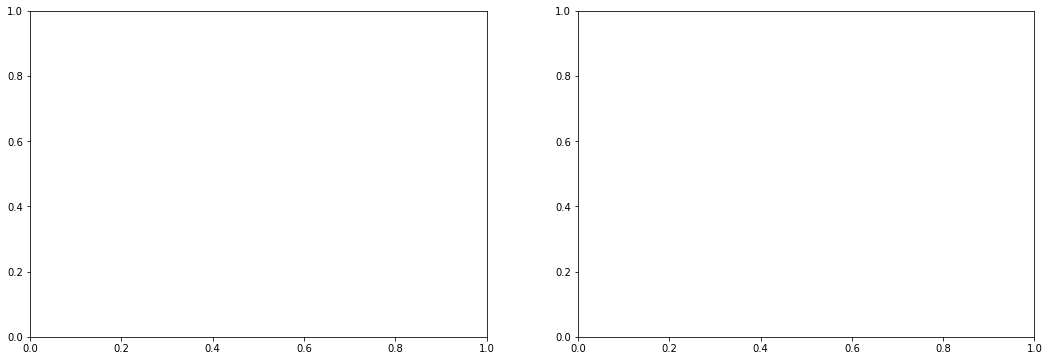

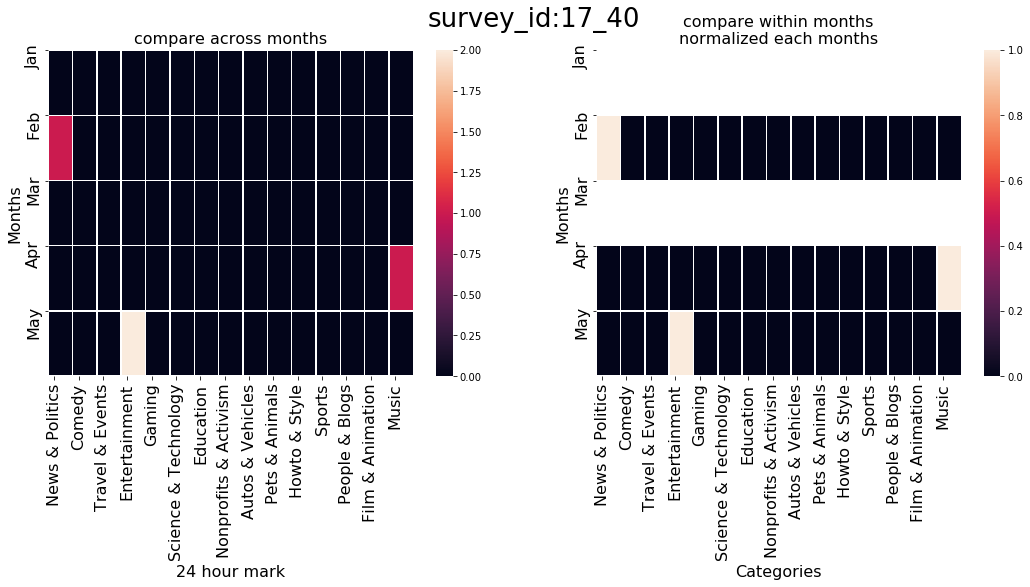

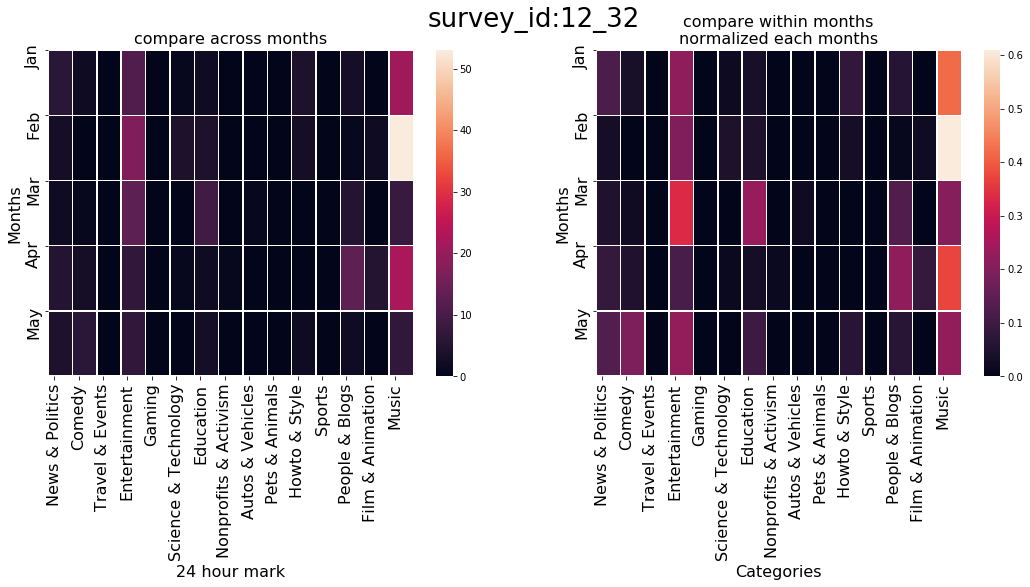

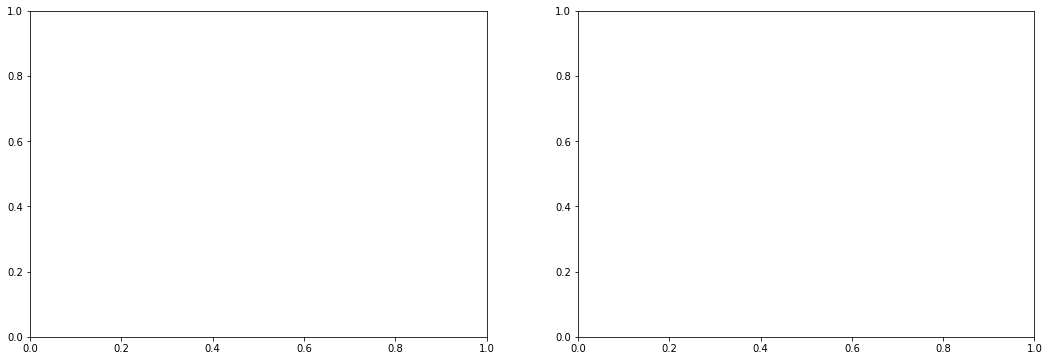

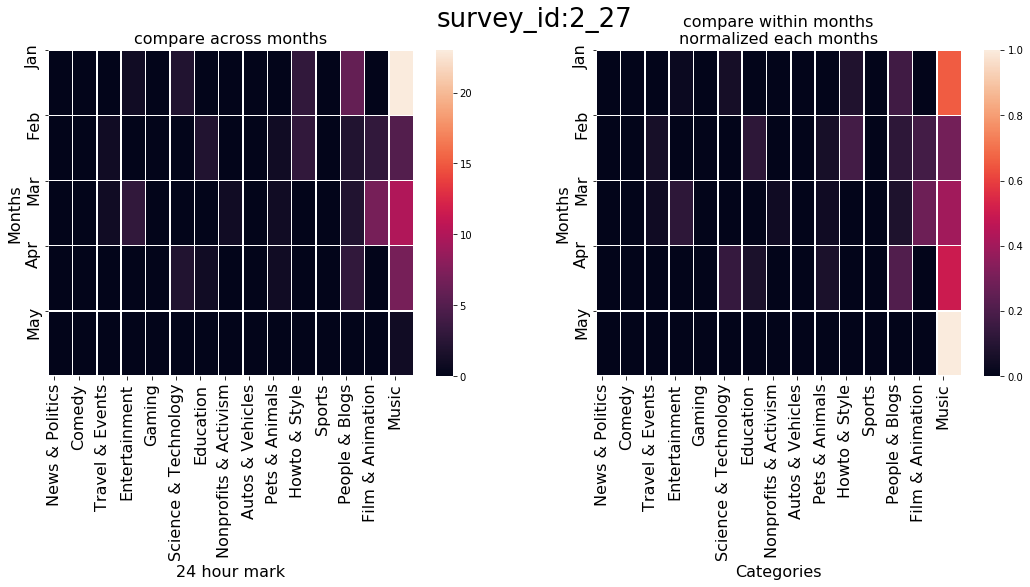

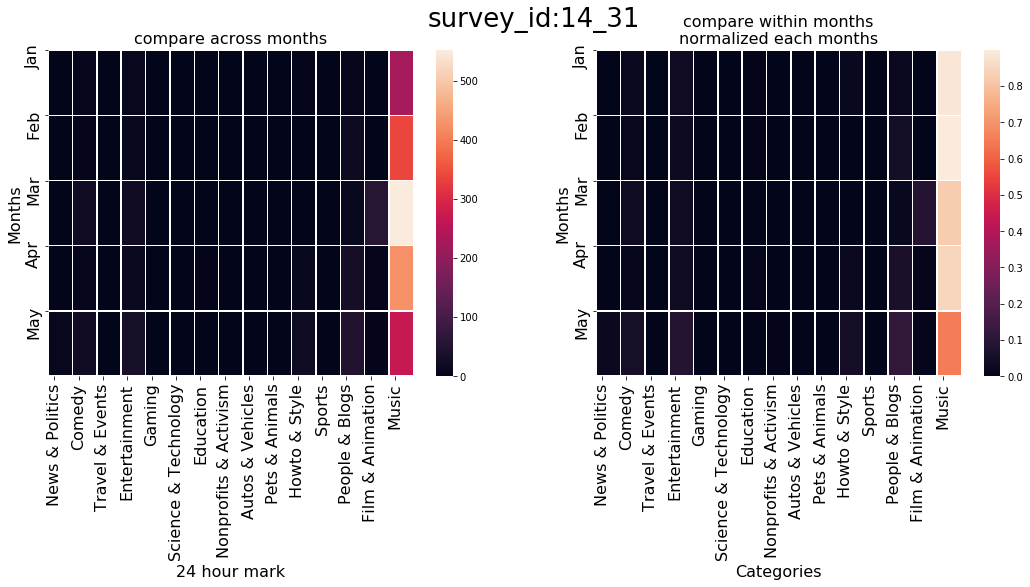

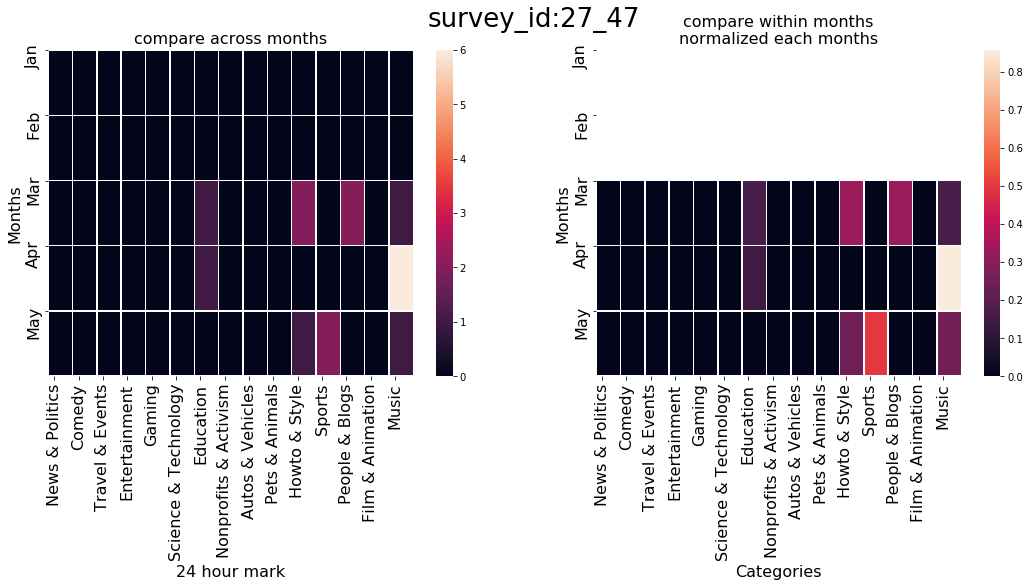

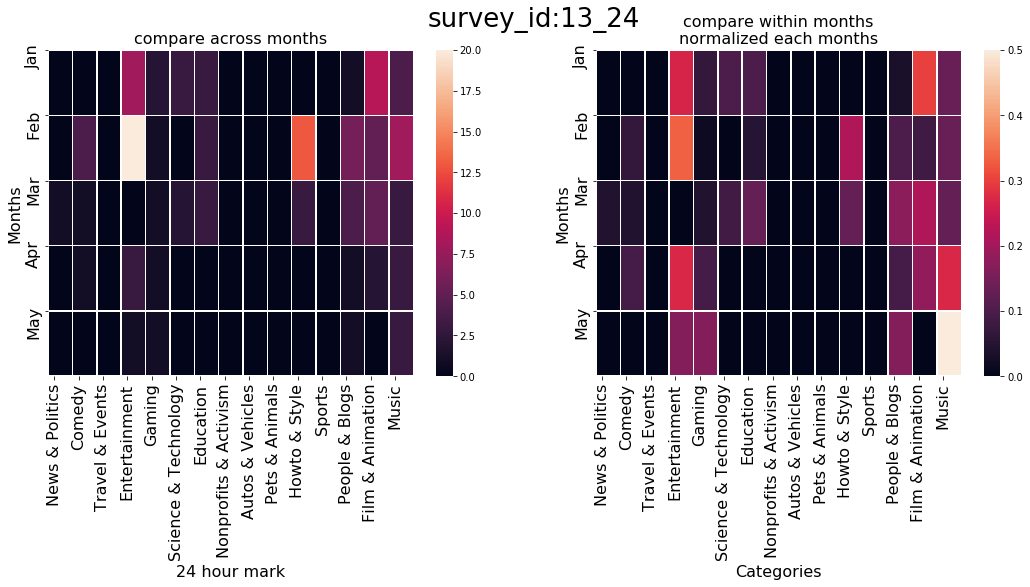

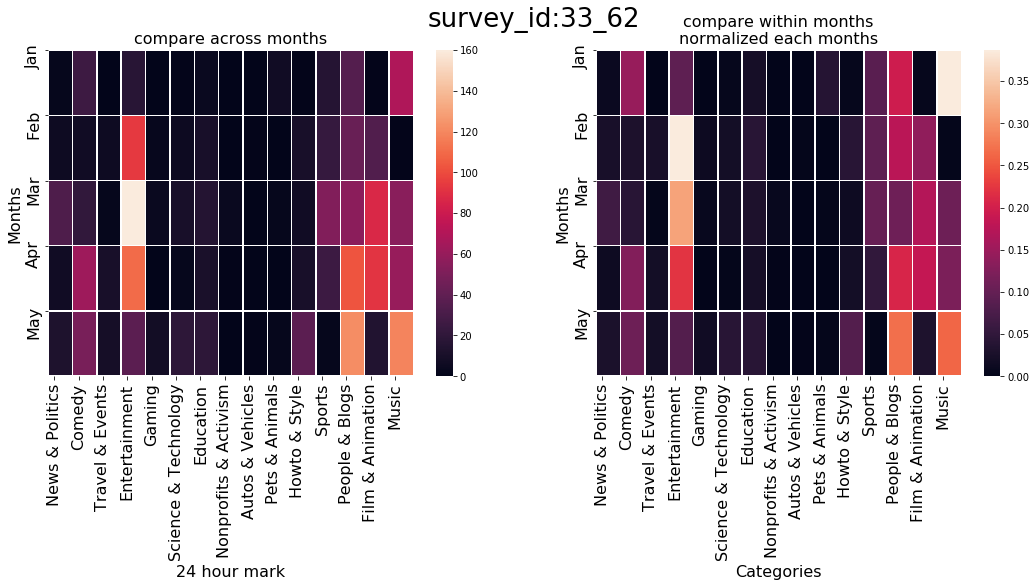

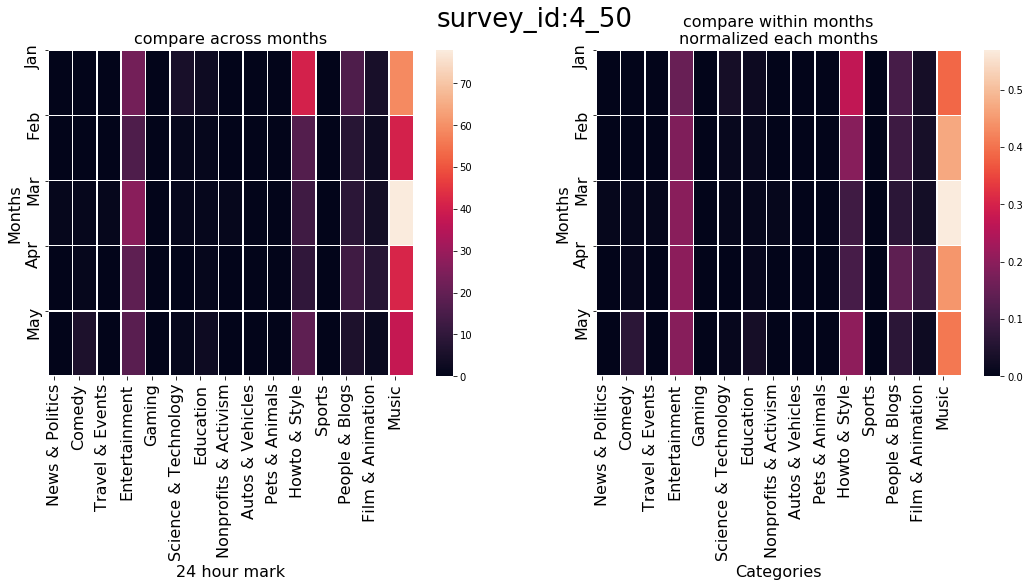

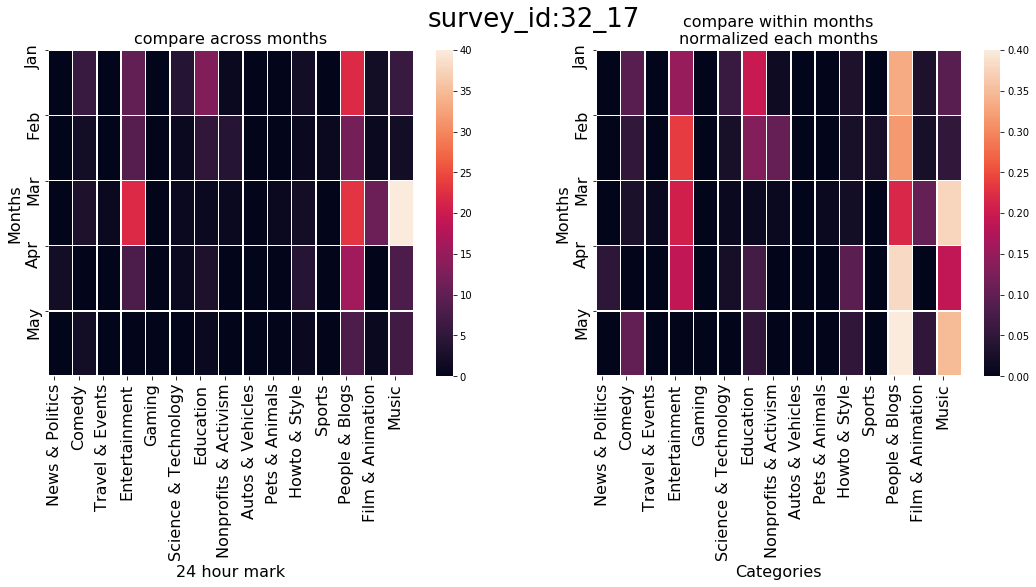

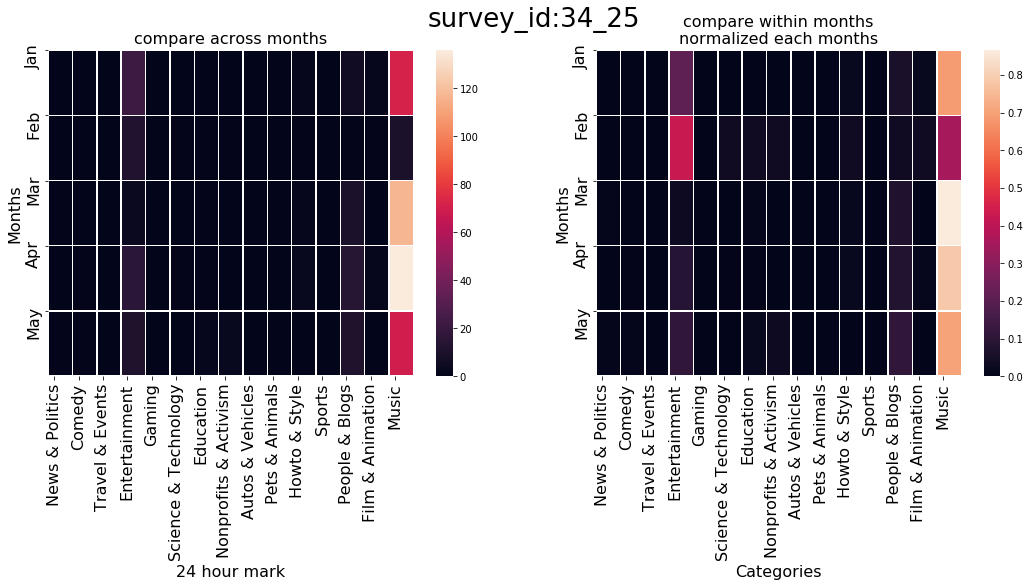

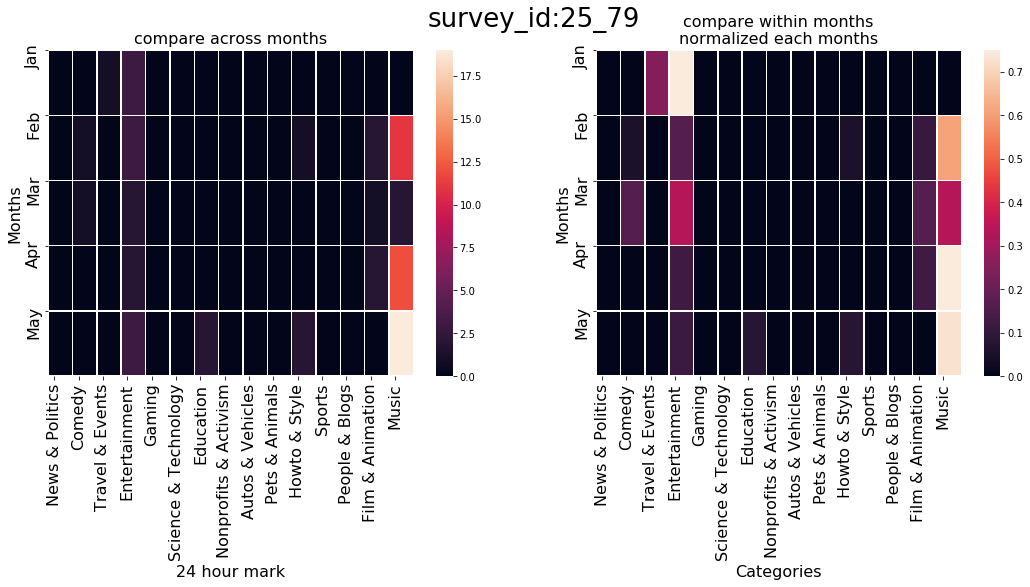

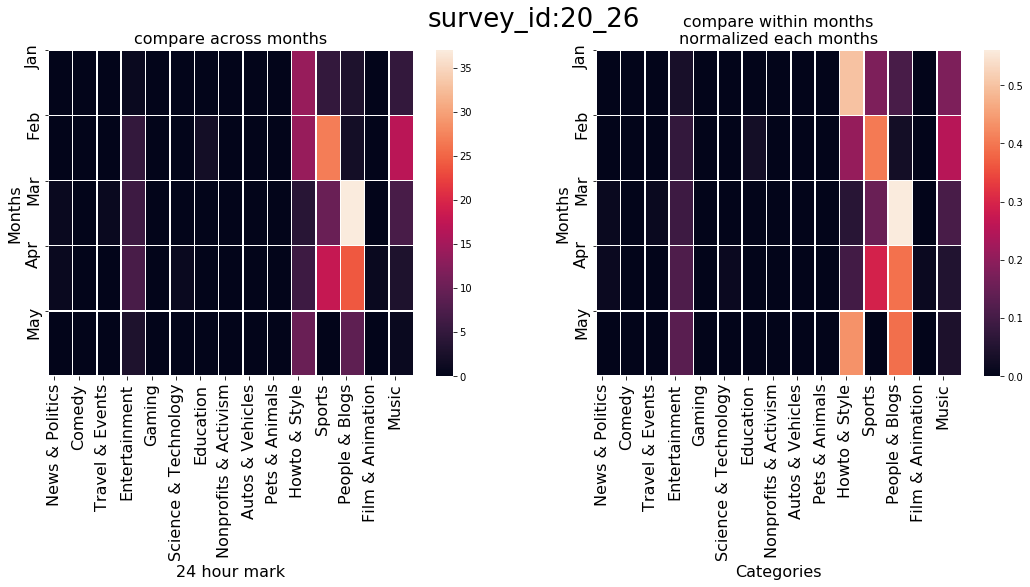

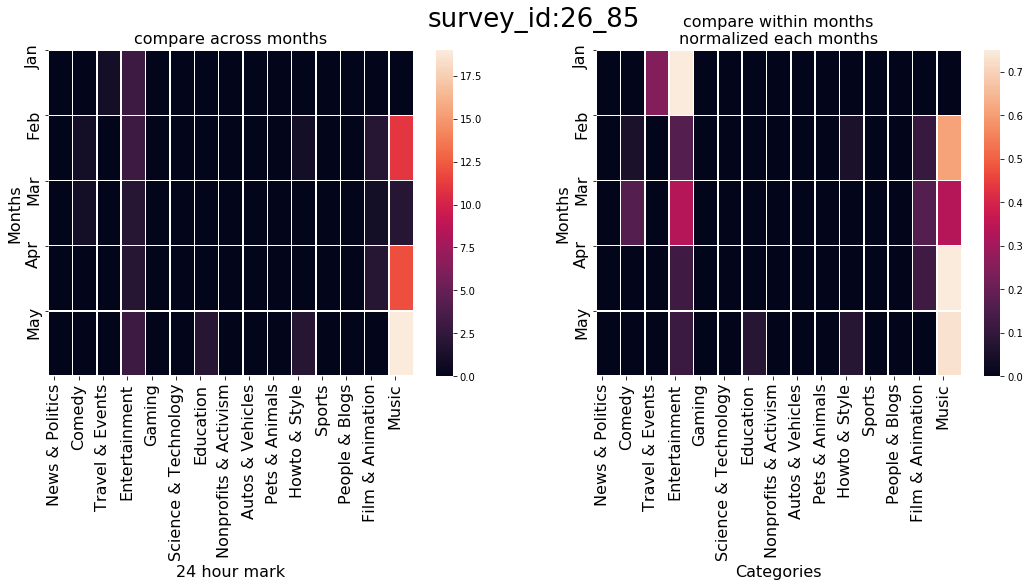

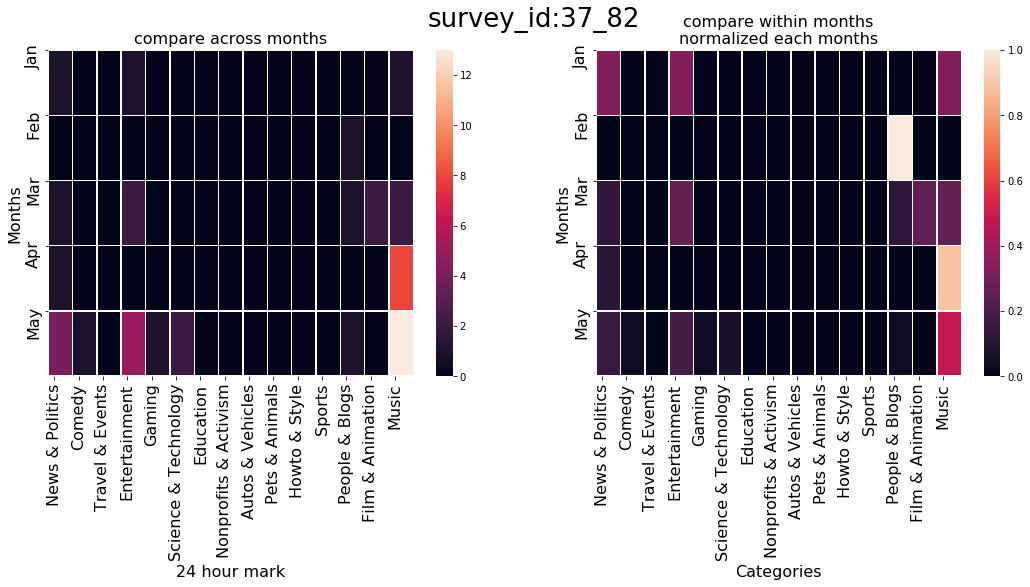

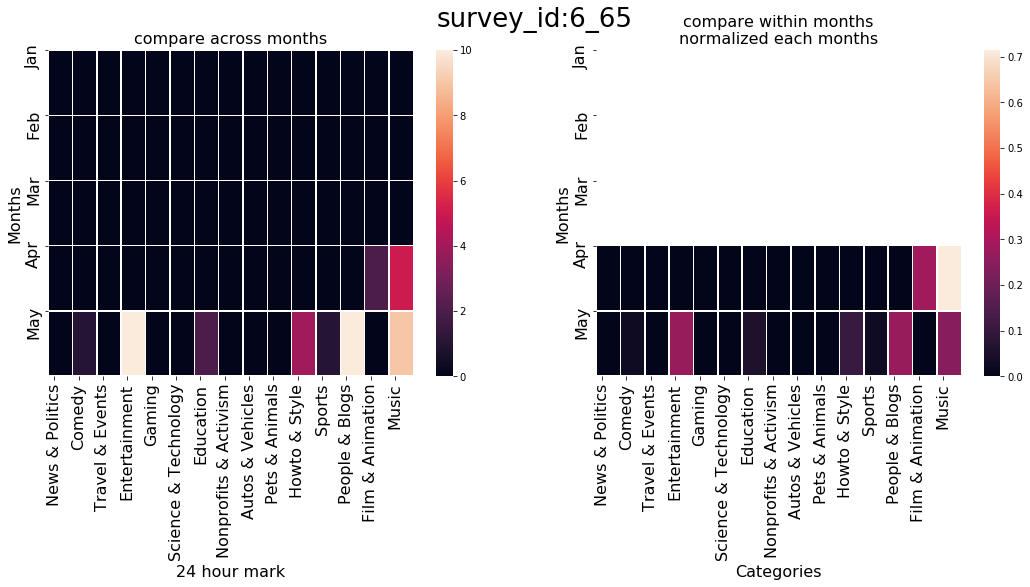

In [5]:
for f in files:
    id_ = f.split('/')[-1].split('.')[0]
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df_jan = df[(df.years == 2020) & (df.months == 1)]
    df_feb = df[(df.years == 2020) & (df.months == 2)]
    df_march = df[(df.years == 2020) & (df.months == 3)]
    df_april = df[(df.years == 2020) & (df.months == 4)]
    df_may = df[(df.years == 2020) & (df.months == 5)]
    df_june = df[(df.years == 2020) & (df.months == 6)]

    df_2020_weekend_events = df[df.weekdays >= 5]
    df_2020_weekday_events = df[df.weekdays < 5]
    
    hrly_youtube_cat_dist = []
    
    for mdf in [df_jan,df_feb,df_march,df_april,df_may]:
        youtubedf = mdf[mdf.source=='youtube']
        cat_dist = [0.0 for i in range(len(categories))]
        for cat_name,count in youtubedf.categories.value_counts().sort_index().to_dict().items():
            cat = ast.literal_eval(cat_name)[0]
            cat_dist[name_to_index[cat]]+=count
        
        hrly_youtube_cat_dist.append(cat_dist)
        
    f, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    hrly_youtube_cat_dist = np.array(hrly_youtube_cat_dist)
    #hrly_youtube_activities = np.where(hrly_youtube_activities==0, 1, hrly_youtube_activities) 
    if hrly_youtube_cat_dist.sum() > 0:
        sns.heatmap(hrly_youtube_cat_dist,linewidths=.5,ax=axes[0])
        axes[0].set_xlabel('24 hour mark', fontsize=16)
        axes[0].set_ylabel('Months', fontsize=16)
        axes[0].set_yticks([0,1,2,3,4])
        axes[0].set_yticklabels(['Jan','Feb','Mar','Apr','May'], fontsize=16)
        axes[0].set_xticks([i+0.25 for i in range(len(categories))])
        axes[0].set_xticklabels(categories, fontsize=16, rotation=90) 
        axes[0].set_title('compare across months', fontsize=16)
        
        
        normalized_hrly_youtube_cat_dist = hrly_youtube_cat_dist/hrly_youtube_cat_dist.sum(axis=1)[:,None]
        sns.heatmap(normalized_hrly_youtube_cat_dist,linewidths=.5,ax=axes[1])
        axes[1].set_xlabel('Categories', fontsize=16)
        axes[1].set_ylabel('Months', fontsize=16)
        axes[1].set_yticks([0,1,2,3,4])
        axes[1].set_yticklabels(['Jan','Feb','Mar','Apr','May'], fontsize=16)
        axes[1].set_xticks([i+0.25 for i in range(len(categories))])
        axes[1].set_xticklabels(categories, fontsize=16, rotation=90) 
        axes[1].set_title('compare within months\nnormalized each months', fontsize=16)
        f.suptitle('survey_id:'+str(id_),fontsize=26)

# let's look at all categories google + youtube

In [57]:

def get_cat_name(string):
    """
    given [['/Arts & Entertainment', 0.550000011920929]]
    it returns Arts & Entertainment
    """
    
    if string:
        if type(string) != float:
            content = ast.literal_eval(string)
            if type(content) == list:
                if len(content) != 0:
                    cat_name = content[0]
                    if type(content[0]) == list:
                        cat_name = content[0][0].split('/')[1] 
                    return cat_name
                
import ast
all_categories = set()
for f in files:
    id_ = f.split('/')[-1].split('.')[0]
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df_jan = df[(df.years == 2020) & (df.months == 1)]
    df_feb = df[(df.years == 2020) & (df.months == 2)]
    df_march = df[(df.years == 2020) & (df.months == 3)]
    df_april = df[(df.years == 2020) & (df.months == 4)]
    df_may = df[(df.years == 2020) & (df.months == 5)]
    df_june = df[(df.years == 2020) & (df.months == 6)]

    df_2020_weekend_events = df[df.weekdays >= 5]
    df_2020_weekday_events = df[df.weekdays < 5]
        
    for mdf in [df_jan,df_feb,df_march,df_april,df_may]:
        #youtubedf = mdf#mdf[mdf.source=='youtube' or mdf.source=='search']
        for cat_name,count in mdf.categories.value_counts().sort_index().to_dict().items():
            
            cat = get_cat_name(cat_name)
            if cat != None:
                all_categories.add(cat)

all_categories = list(all_categories)
all_categories_index = [i for i in range(len(all_categories))]
all_cat_name_to_index = {}
for i, name in enumerate(all_categories):
    all_cat_name_to_index[name] = i

In [58]:
all_cat_name_to_index

{'Reference': 0,
 'News & Politics': 1,
 'Finance': 2,
 'Food & Drink': 3,
 'Gaming': 4,
 'Online Communities': 5,
 'Education': 6,
 'Pets & Animals': 7,
 'Arts & Entertainment': 8,
 'Music': 9,
 'Health': 10,
 'People & Society': 11,
 'Shopping': 12,
 'Autos & Vehicles': 13,
 'Computers & Electronics': 14,
 'Home & Garden': 15,
 'People & Blogs': 16,
 'Sensitive Subjects': 17,
 'Books & Literature': 18,
 'Beauty & Fitness': 19,
 'Travel & Events': 20,
 'Comedy': 21,
 'News': 22,
 'Entertainment': 23,
 'Science & Technology': 24,
 'Law & Government': 25,
 'Games': 26,
 'Howto & Style': 27,
 'Internet & Telecom': 28,
 'Sports': 29,
 'Travel': 30,
 'Jobs & Education': 31,
 'Adult': 32,
 'Nonprofits & Activism': 33,
 'Hobbies & Leisure': 34,
 'Science': 35,
 'Business & Industrial': 36,
 'Film & Animation': 37,
 'Real Estate': 38}

/home/anis/anaconda3/envs/mycondaenv/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/home/anis/anaconda3/envs/mycondaenv/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


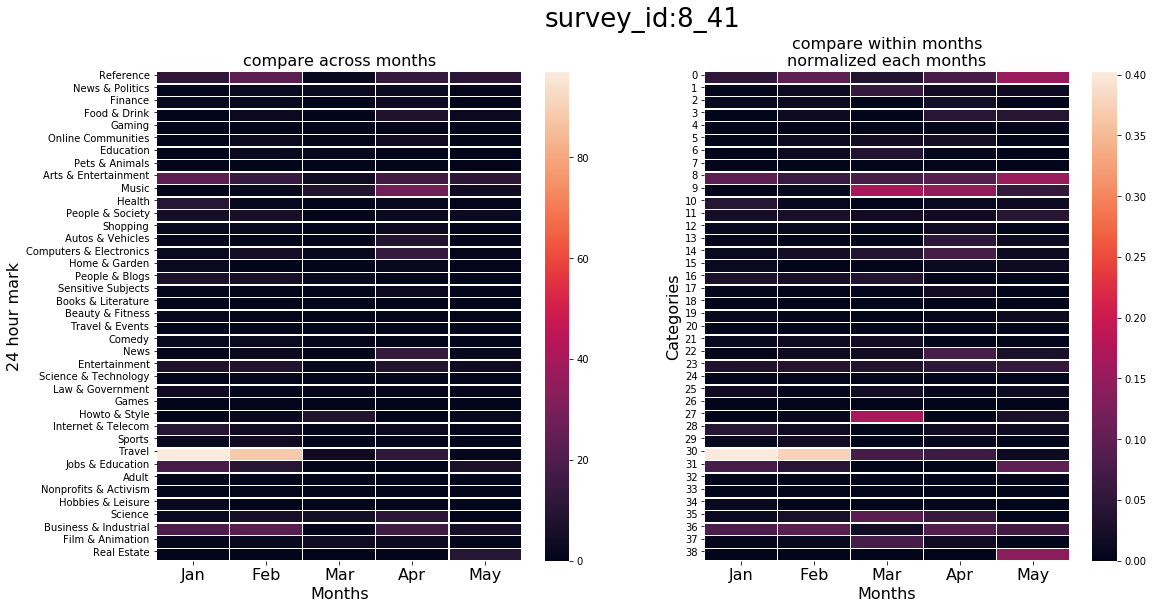

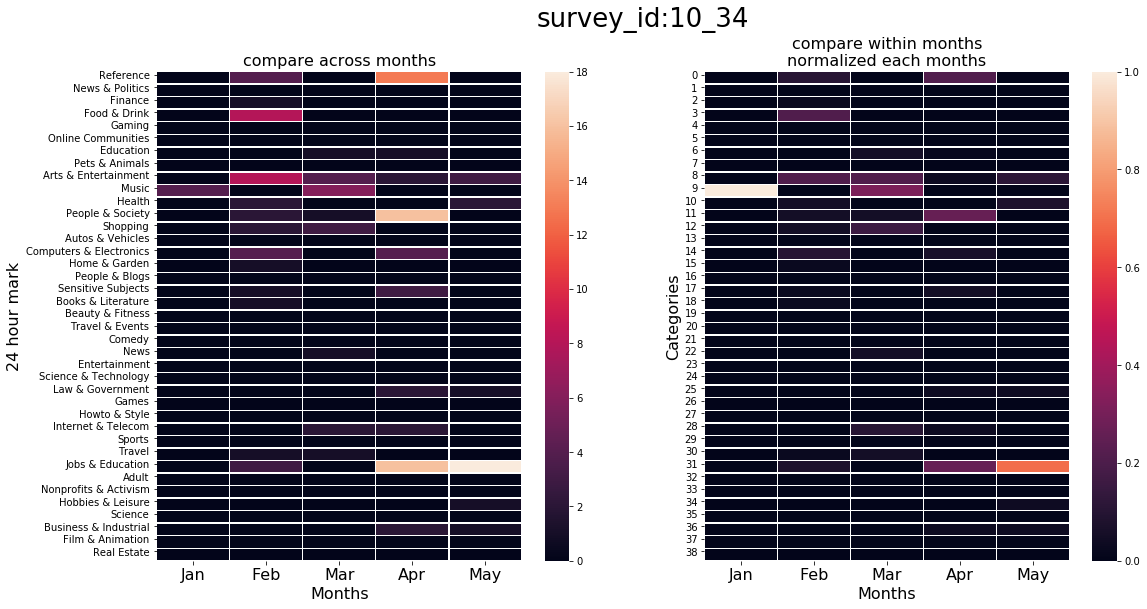

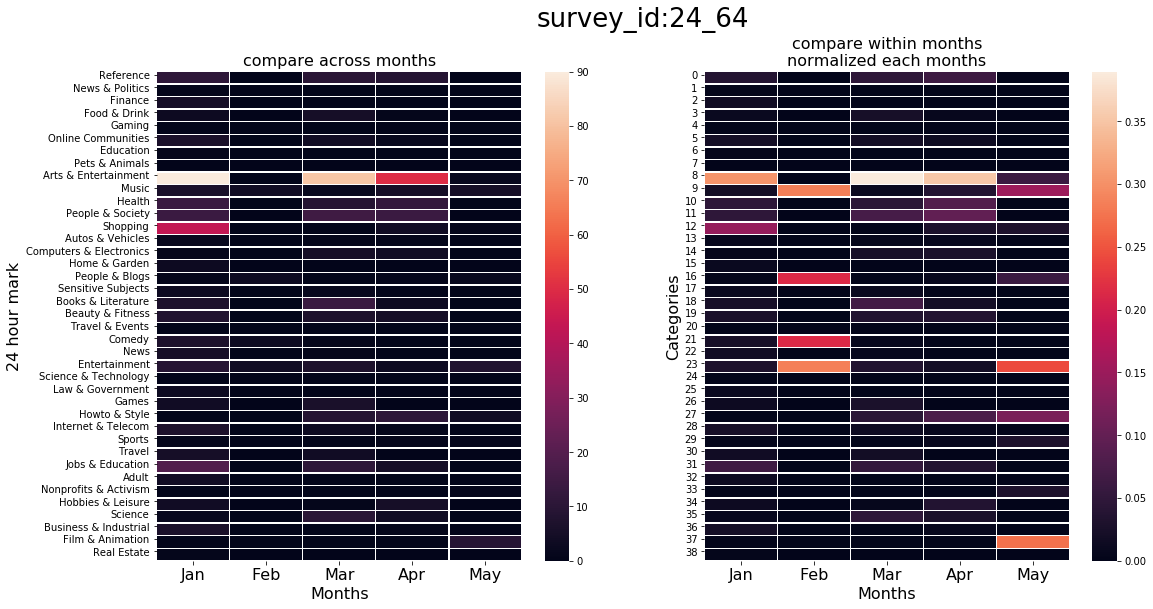

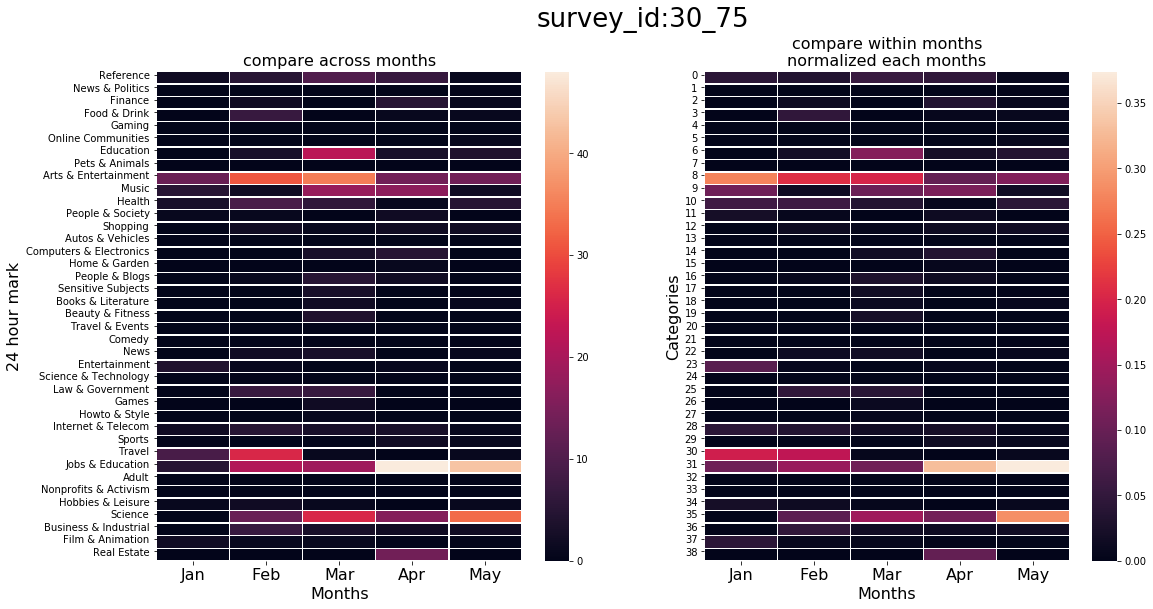

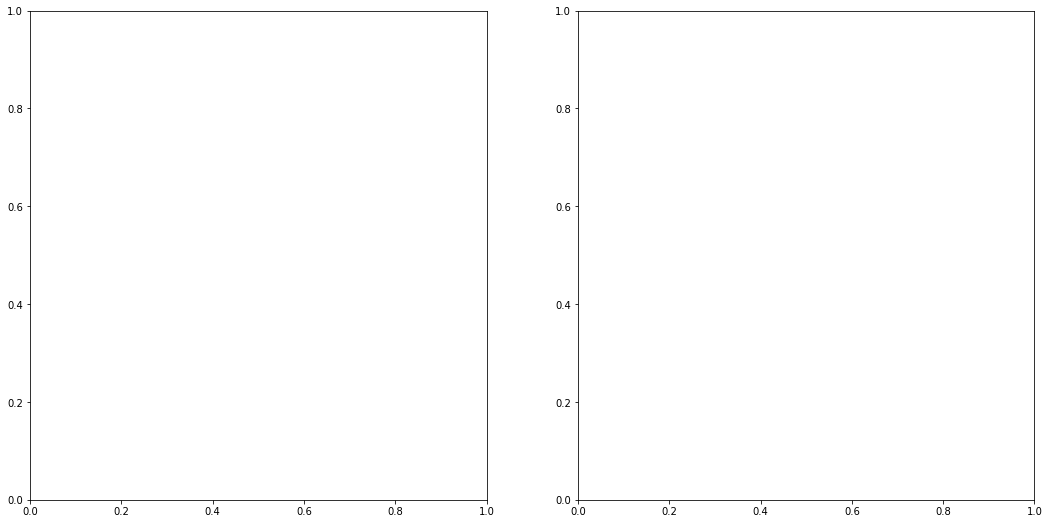

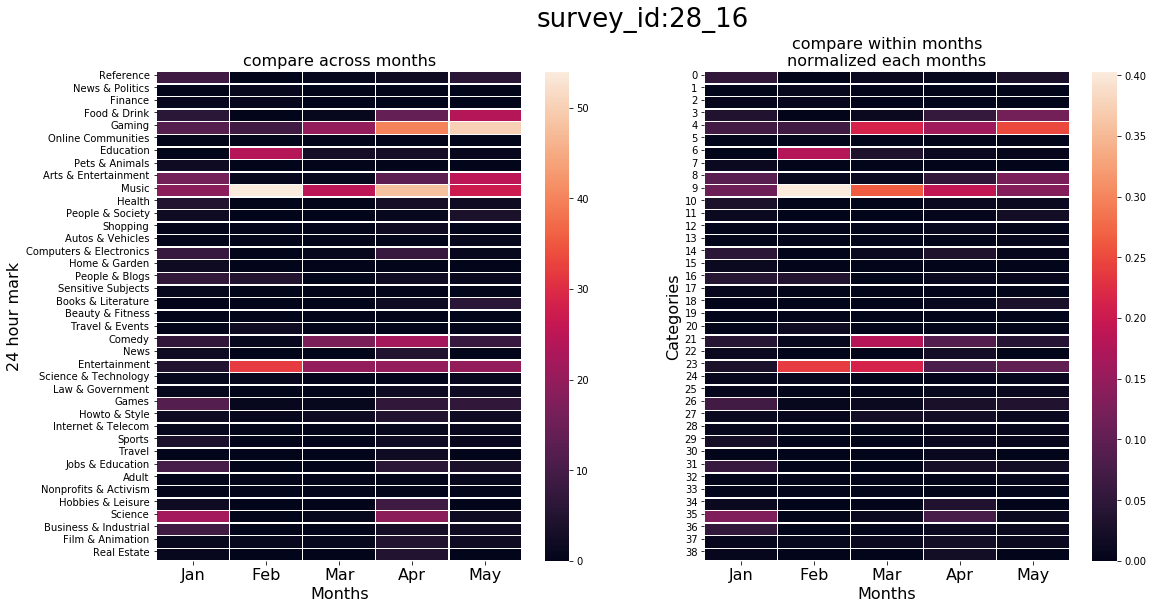

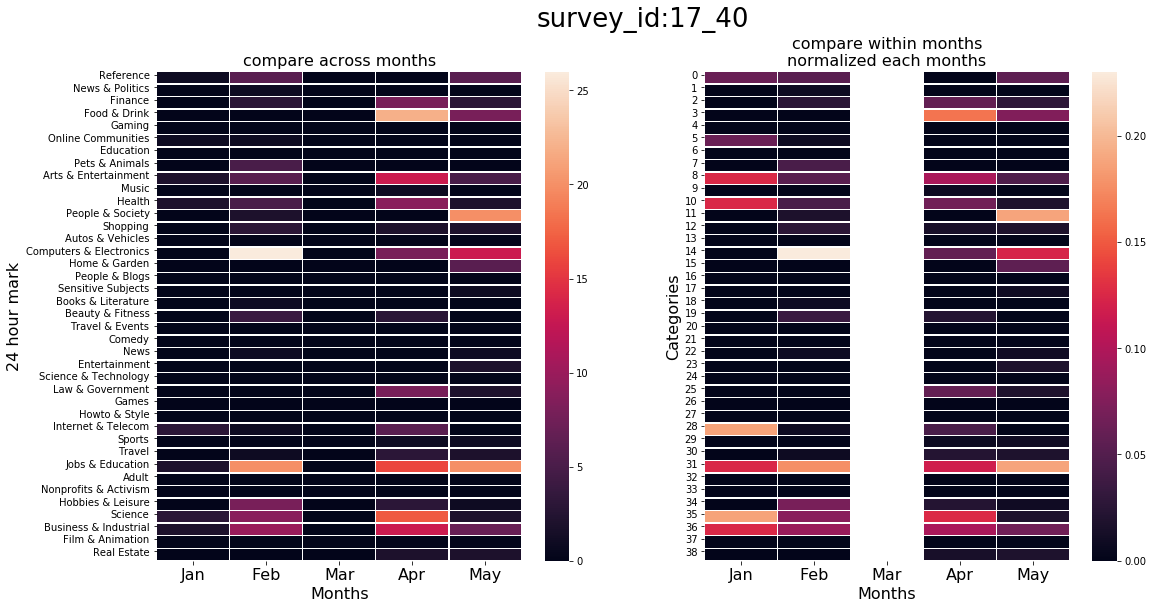

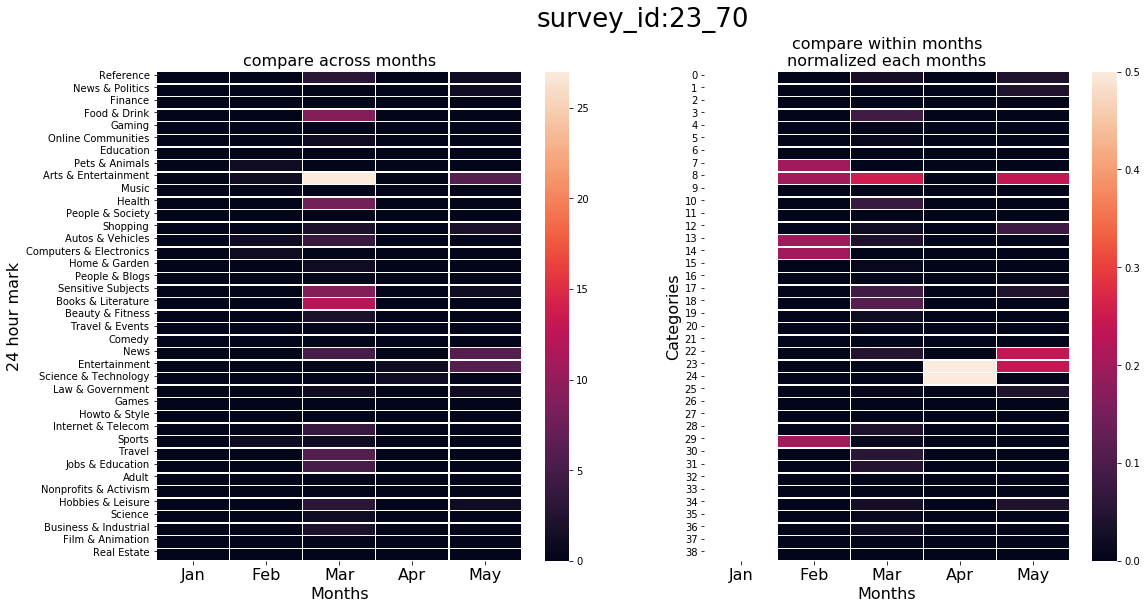

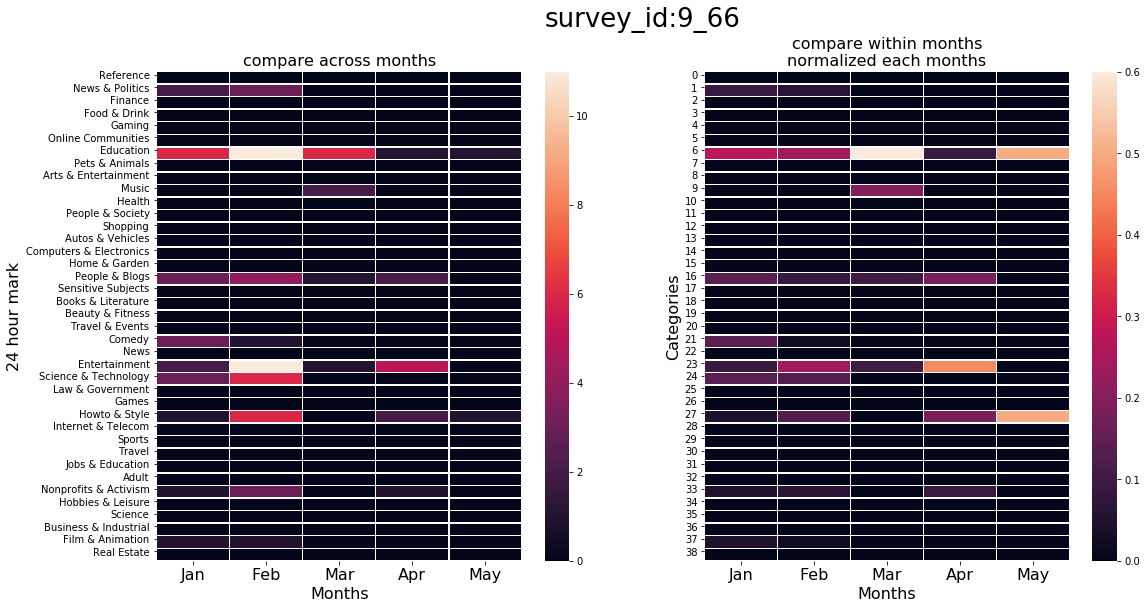

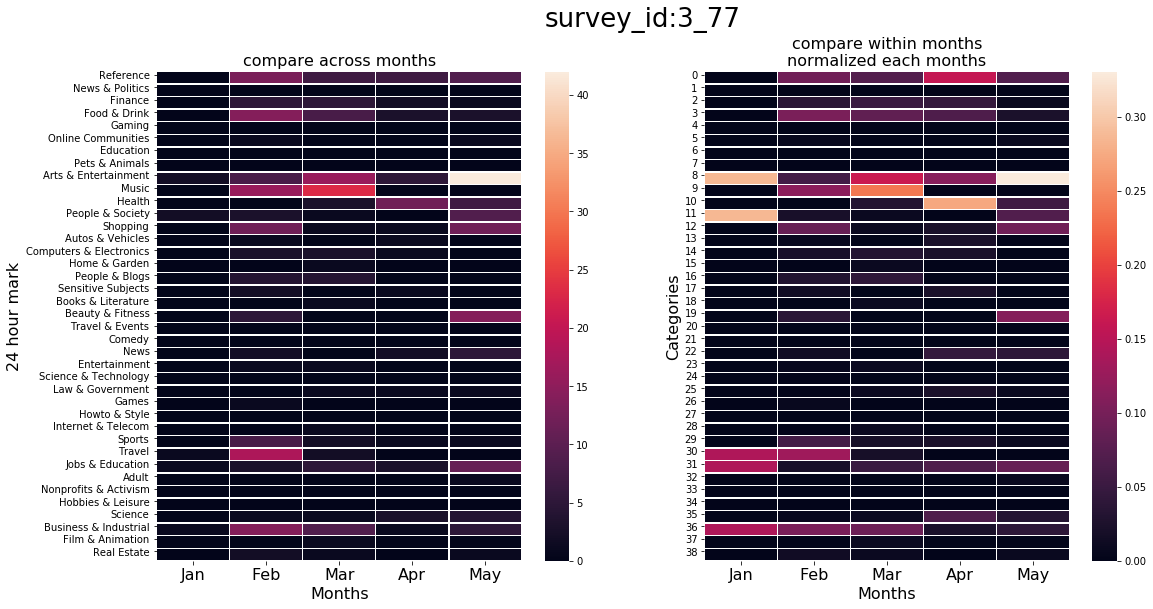

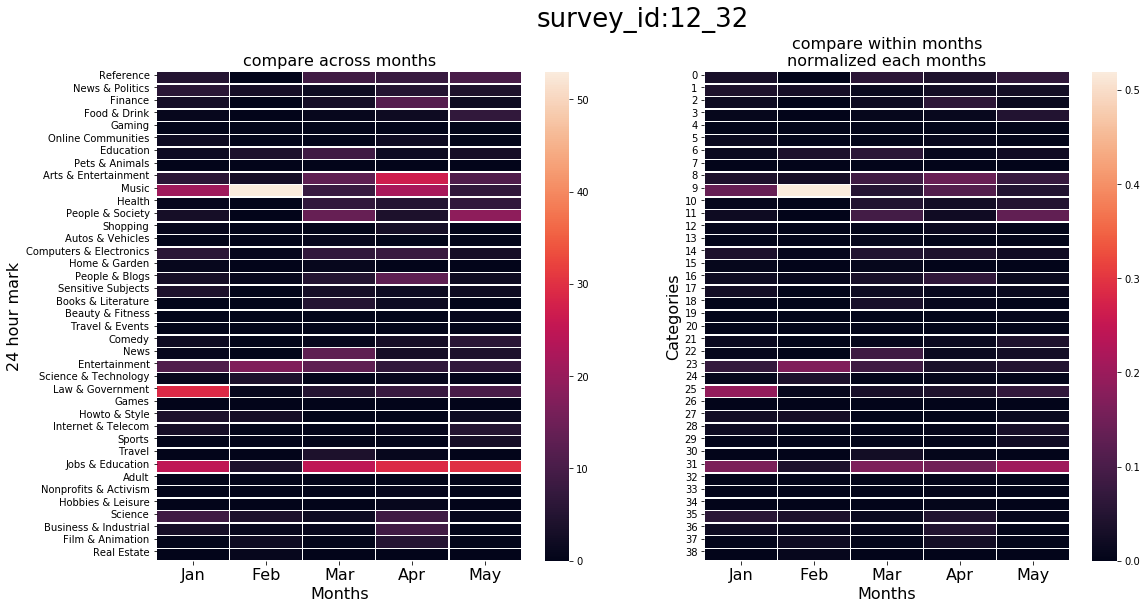

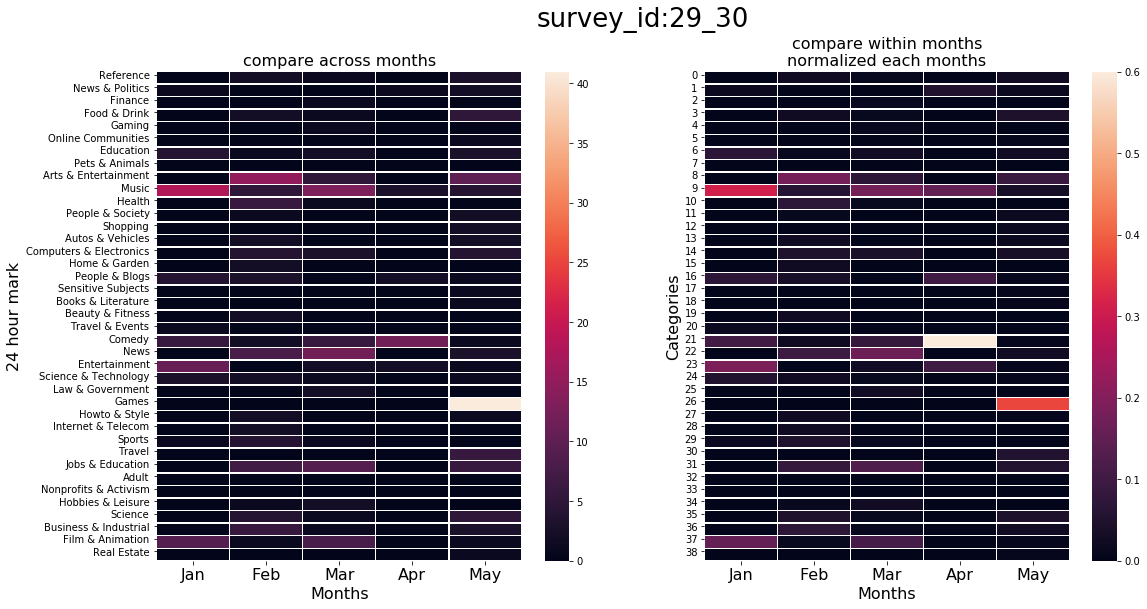

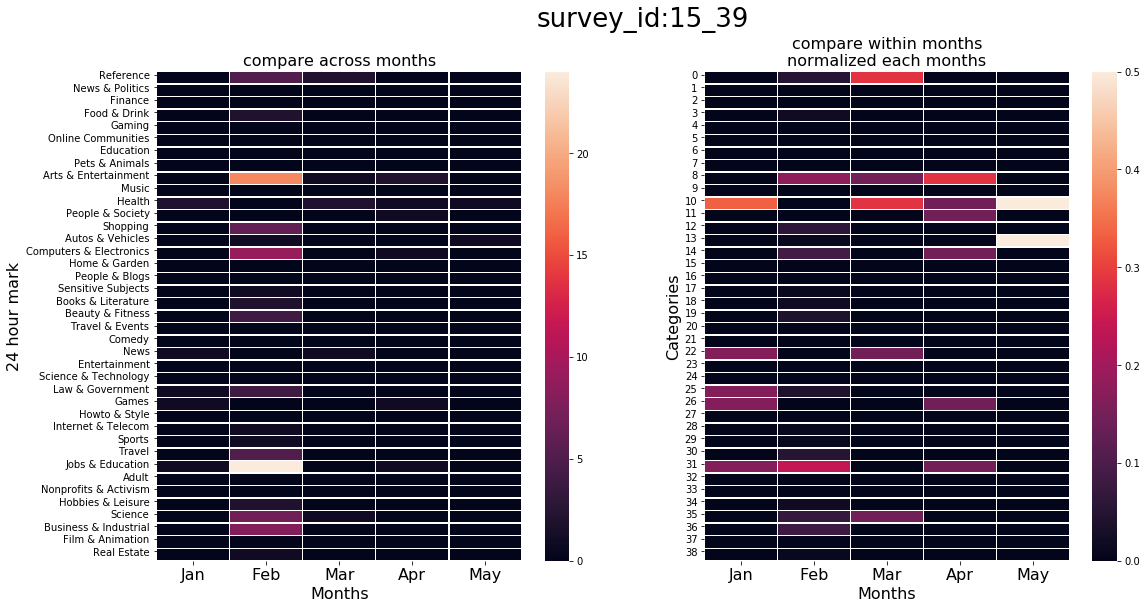

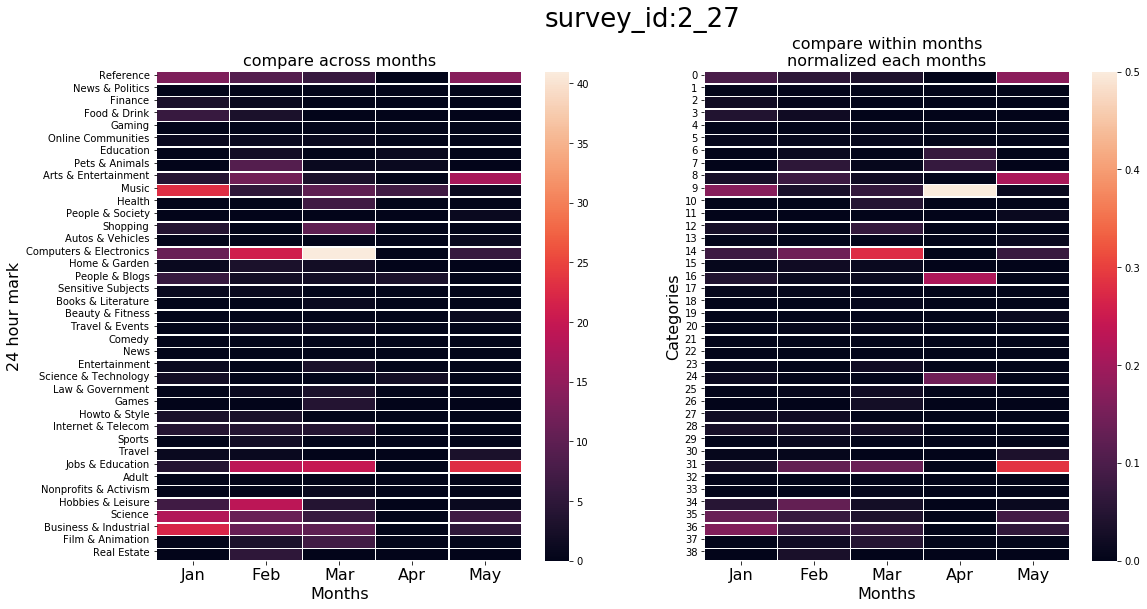

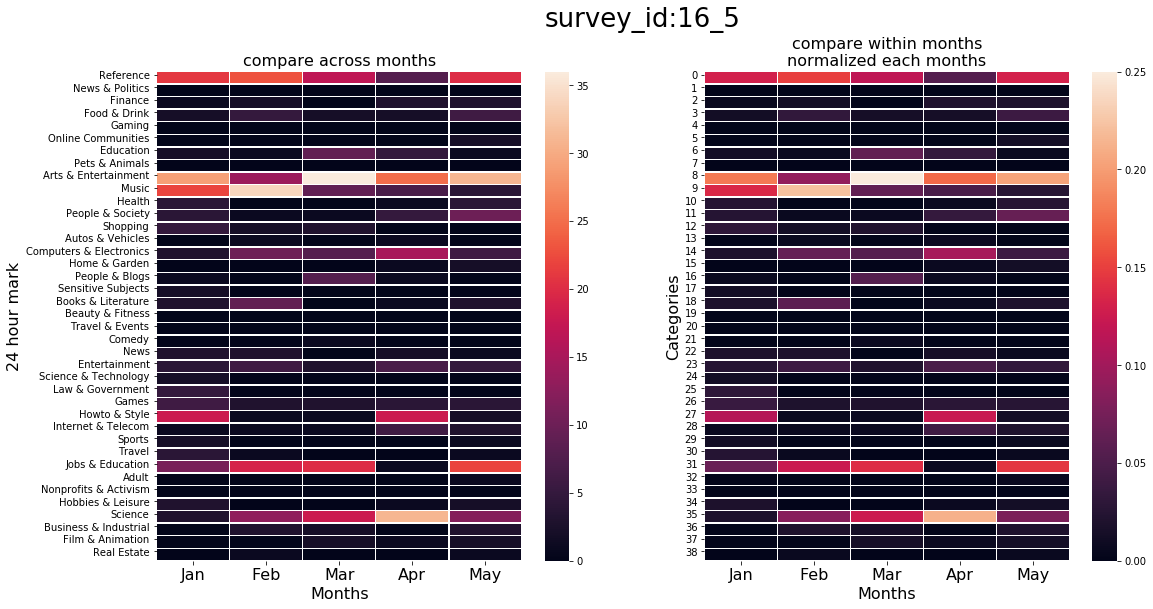

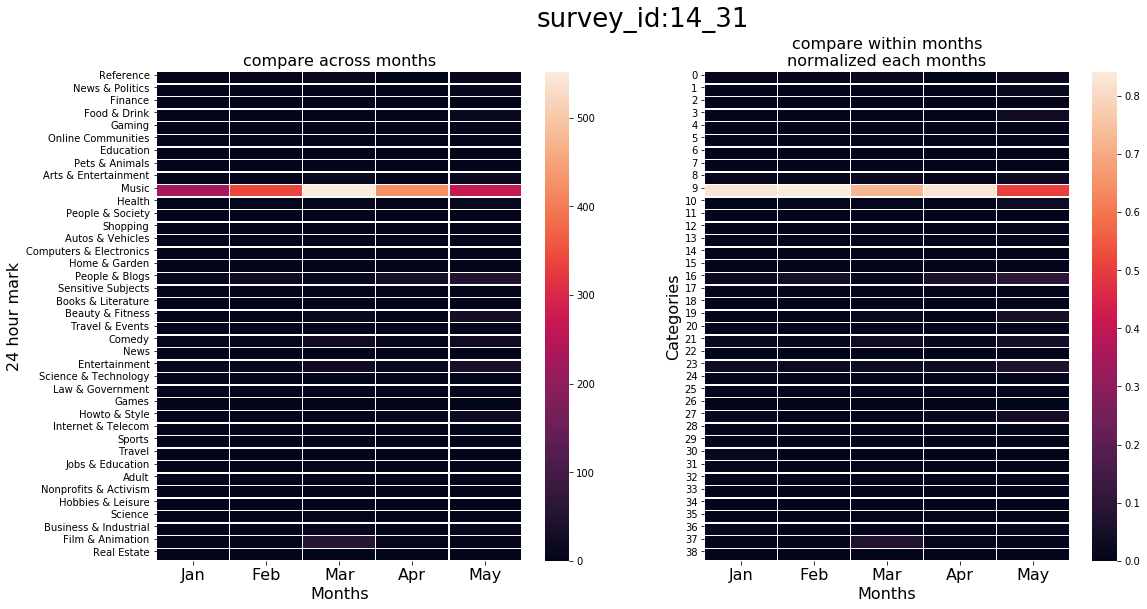

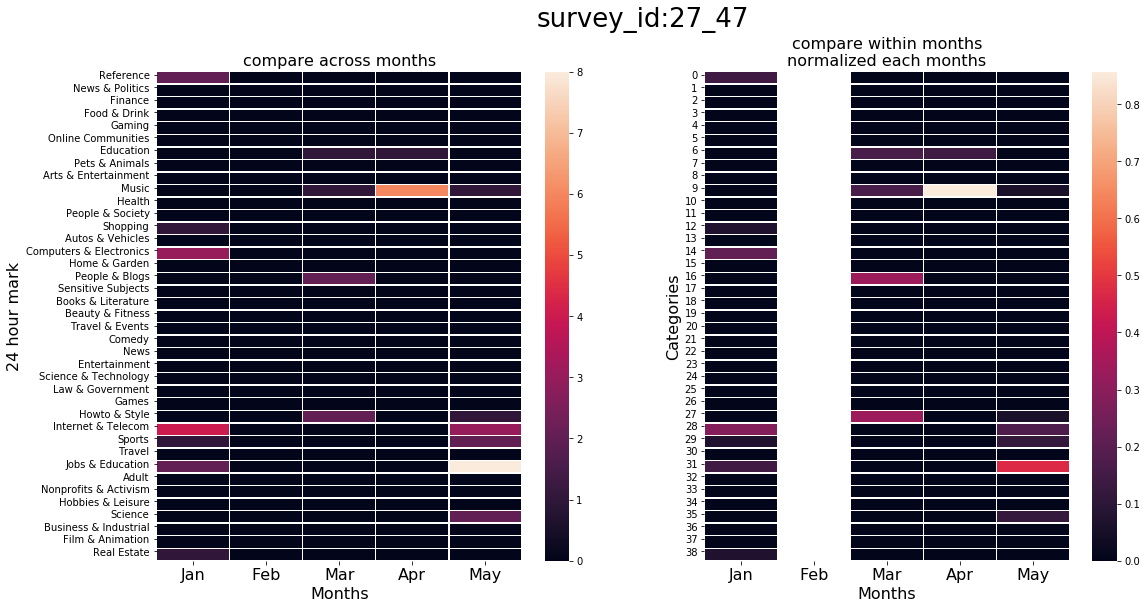

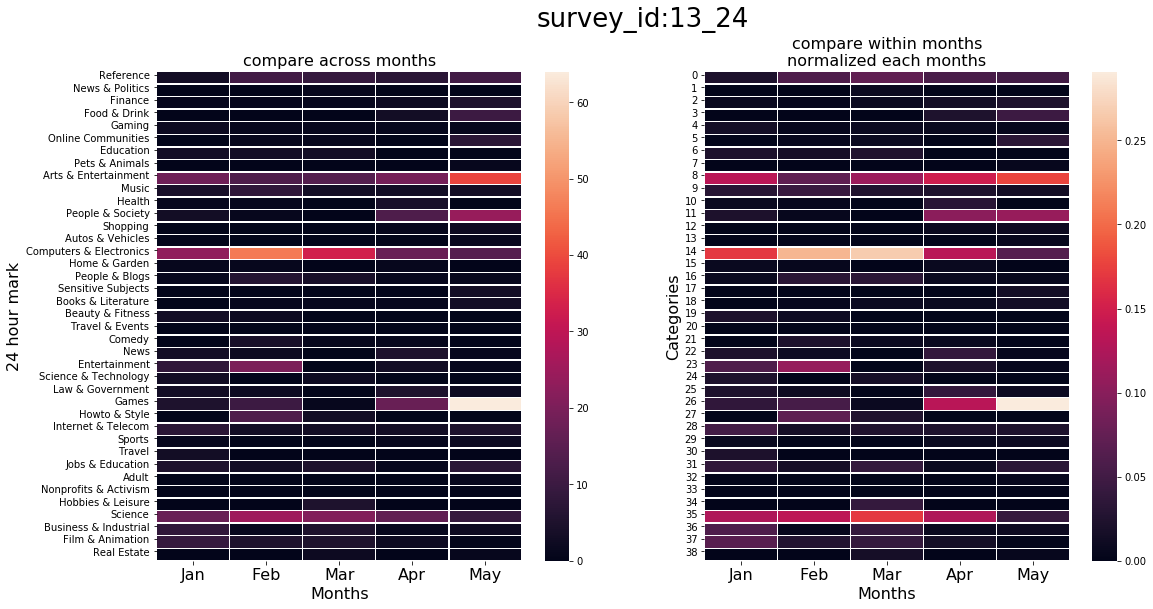

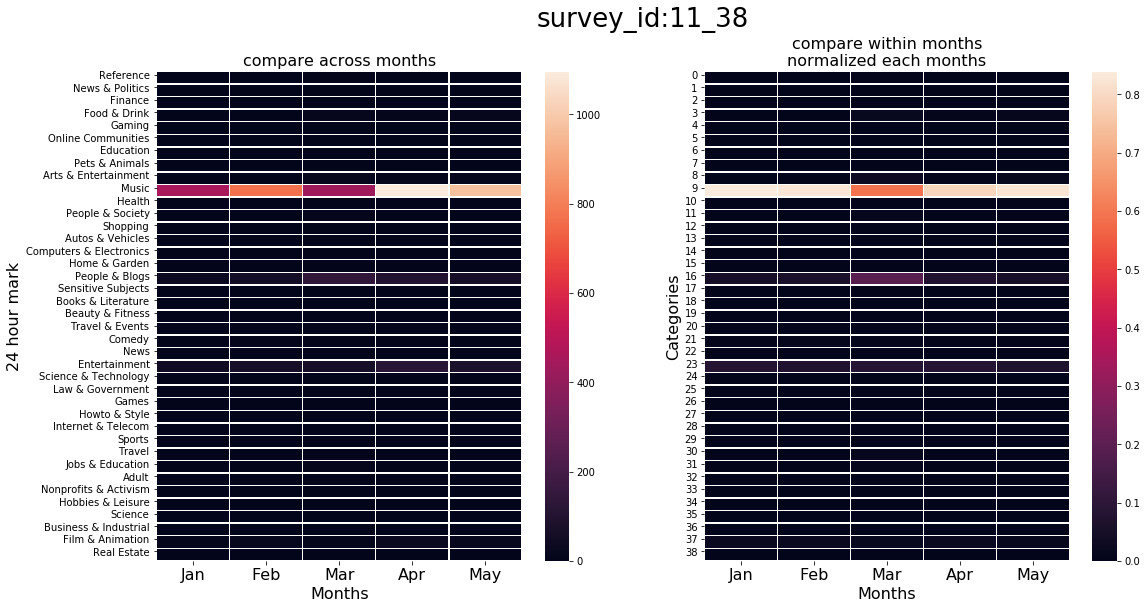

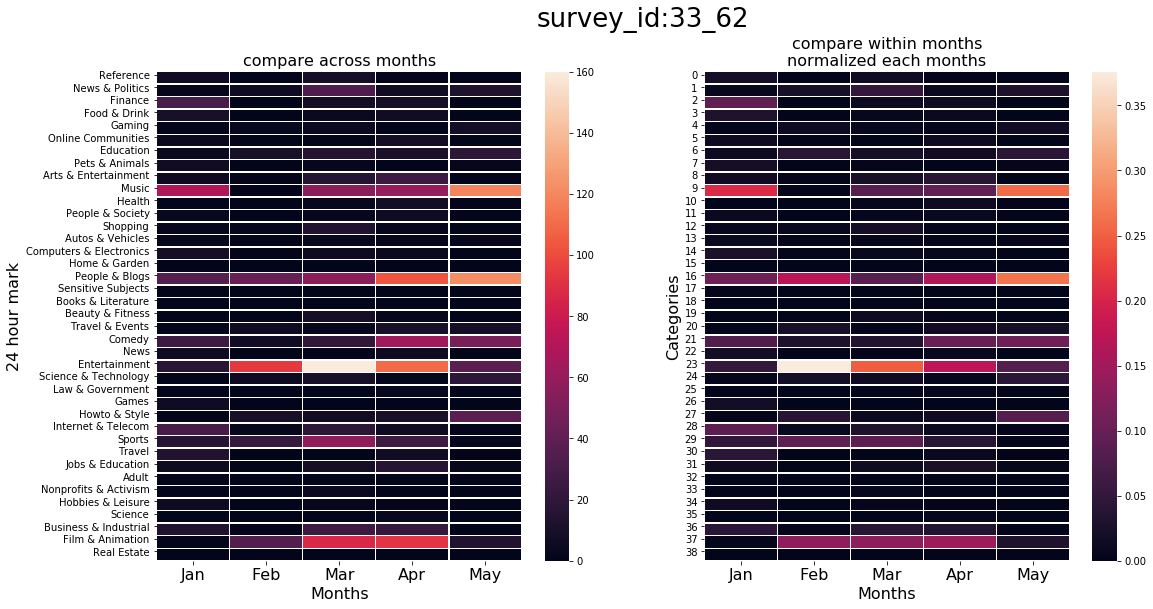

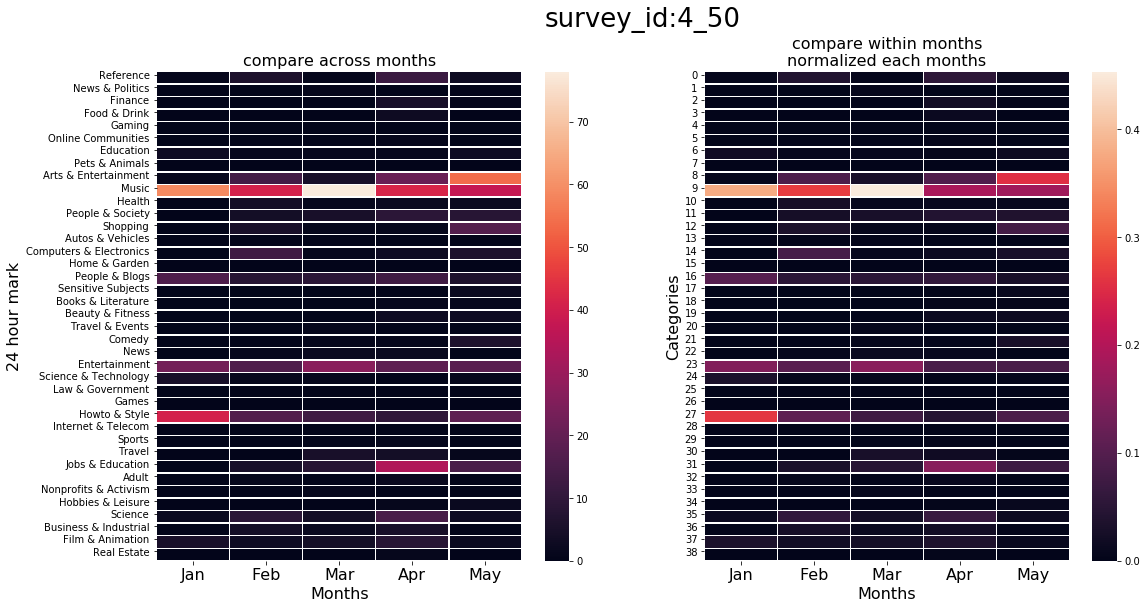

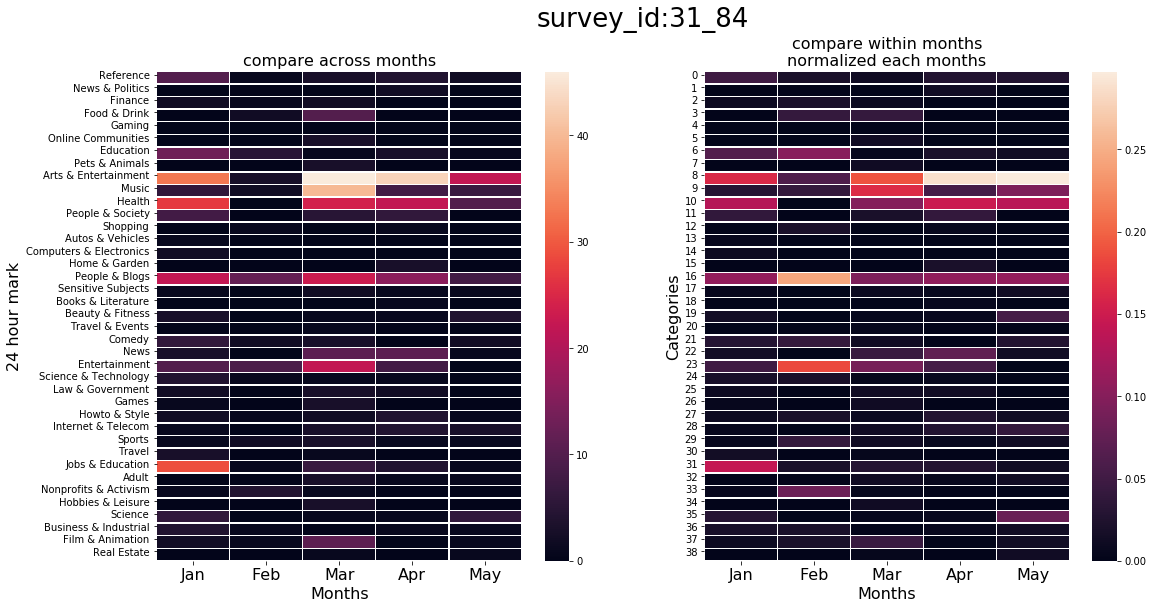

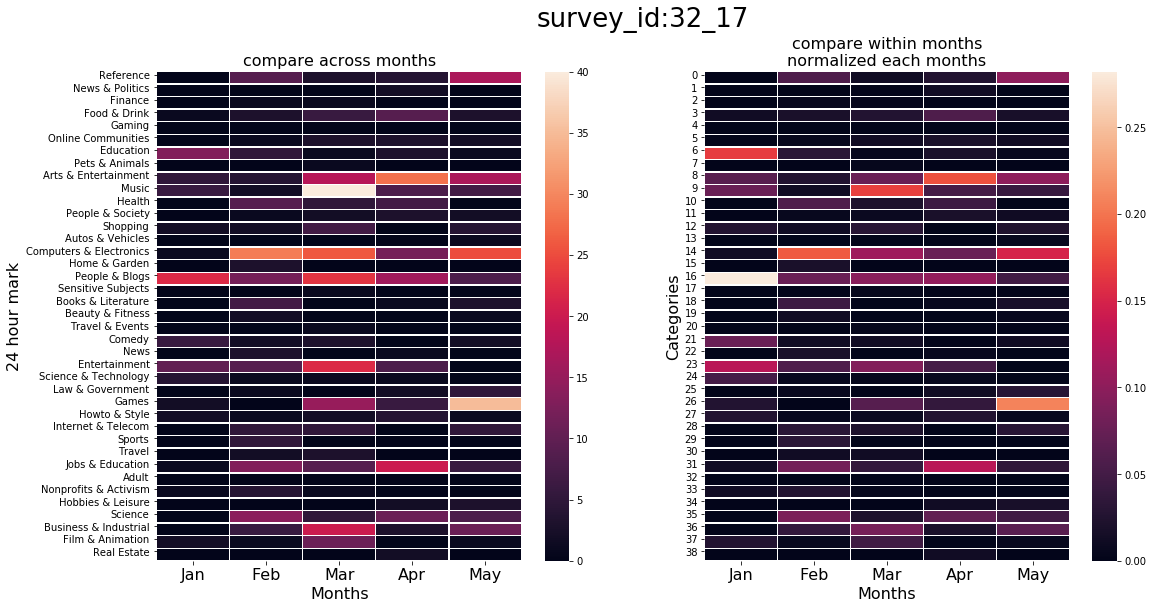

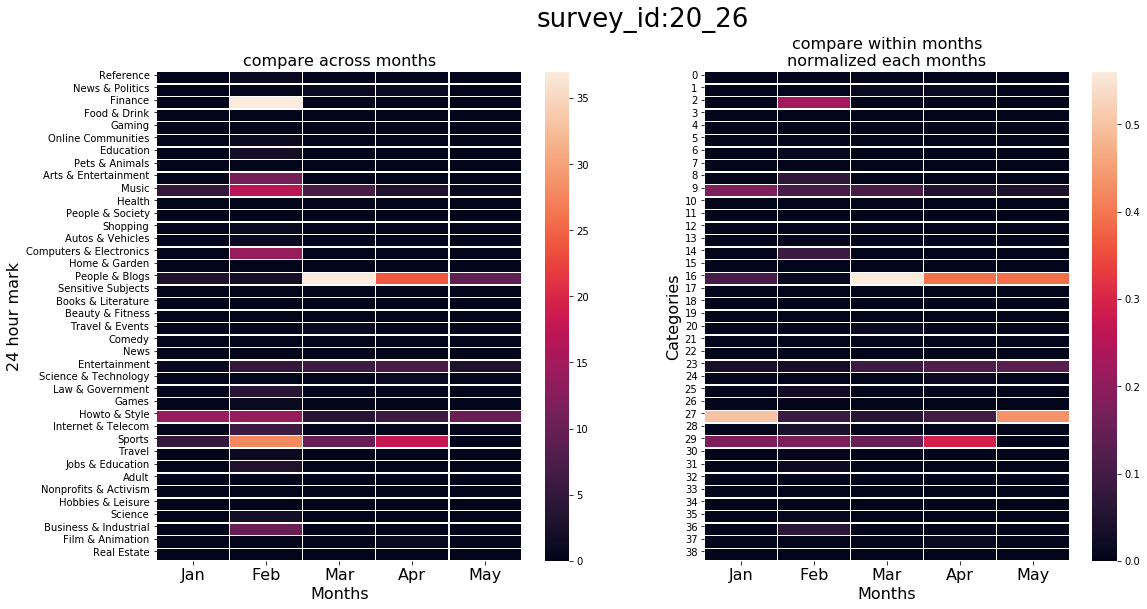

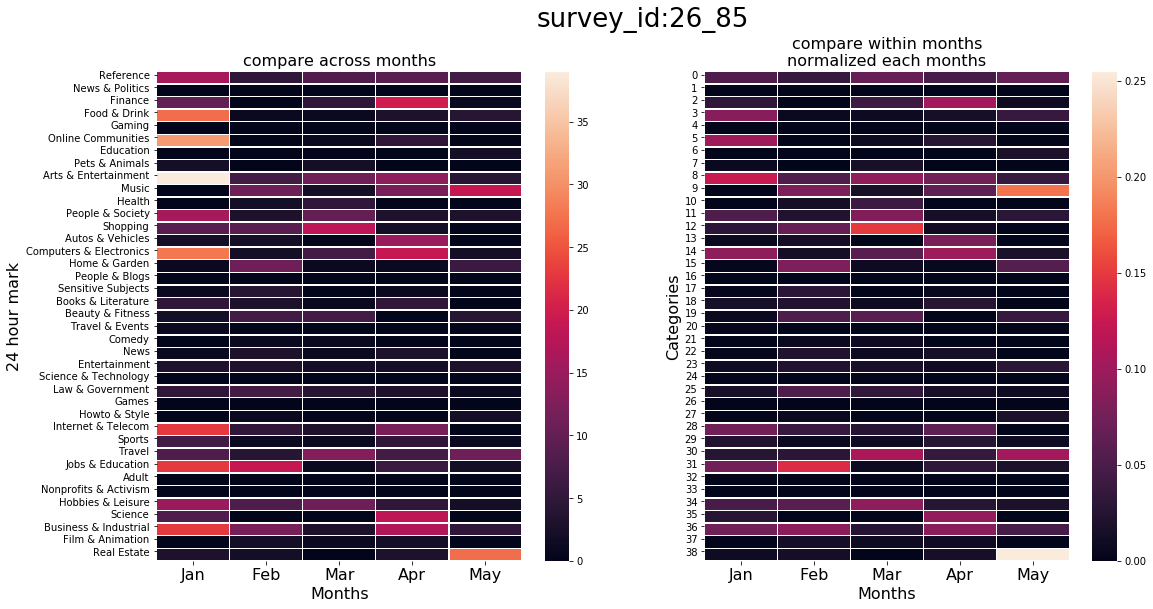

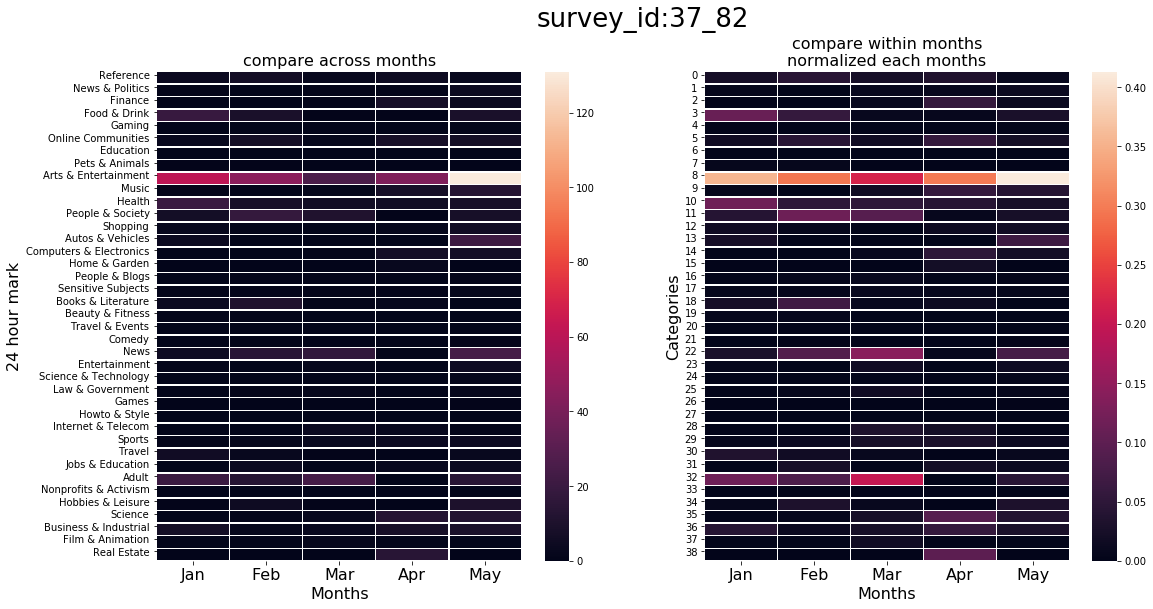

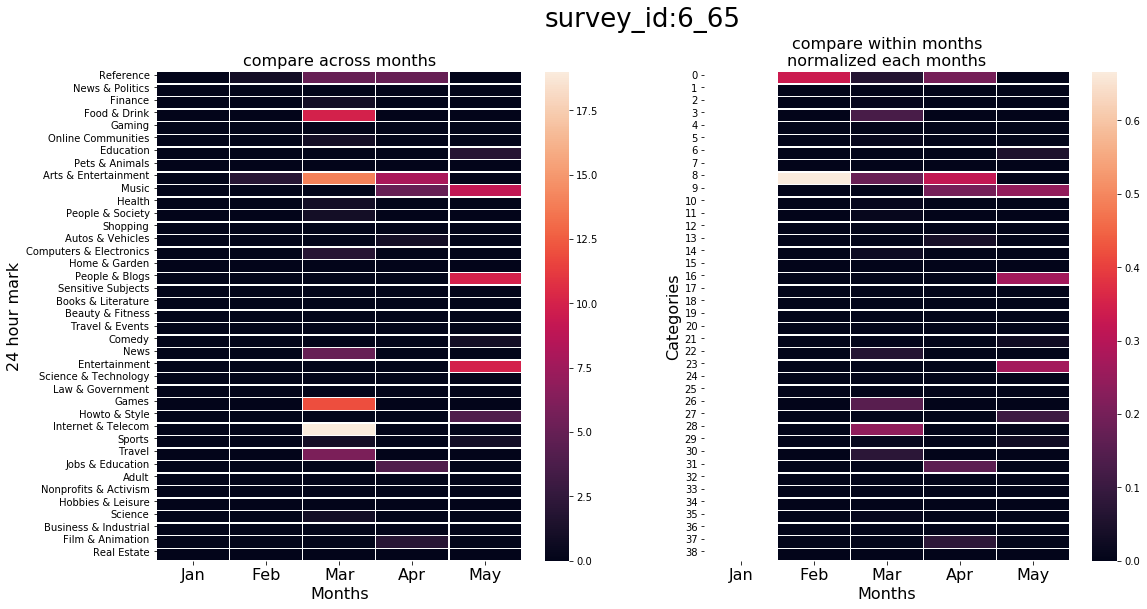

In [72]:
for f in files:
    id_ = f.split('/')[-1].split('.')[0]
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df_jan = df[(df.years == 2020) & (df.months == 1)]
    df_feb = df[(df.years == 2020) & (df.months == 2)]
    df_march = df[(df.years == 2020) & (df.months == 3)]
    df_april = df[(df.years == 2020) & (df.months == 4)]
    df_may = df[(df.years == 2020) & (df.months == 5)]
    df_june = df[(df.years == 2020) & (df.months == 6)]

    df_2020_weekend_events = df[df.weekdays >= 5]
    df_2020_weekday_events = df[df.weekdays < 5]
    
    hrly_cat_dist = []
    
    for mdf in [df_jan,df_feb,df_march,df_april,df_may]:
        #youtubedf = mdf#mdf[mdf.source=='youtube']
        cat_dist = [0.0 for i in range(len(all_categories))]
        for cat_name,count in mdf.categories.value_counts().sort_index().to_dict().items():
            cat = get_cat_name(cat_name)
            if cat != None:
                cat_dist[all_cat_name_to_index[cat]]+=count
        
        hrly_cat_dist.append(cat_dist)
        
    f, axes = plt.subplots(1, 2, figsize=(18, 9))
    
    hrly_cat_dist = np.array(hrly_cat_dist).T

    if hrly_cat_dist.sum() > 0:
        sns.heatmap(hrly_cat_dist,linewidths=.5,ax=axes[0])
        axes[0].set_ylabel('24 hour mark', fontsize=16)
        axes[0].set_xlabel('Months', fontsize=16)
        axes[0].set_xticks([0.5,1.5,2.5,3.5,4.5])
        axes[0].set_xticklabels(['Jan','Feb','Mar','Apr','May'], fontsize=16)
        axes[0].set_yticks([i+0.25 for i in range(len(all_categories))])
        axes[0].set_yticklabels(all_categories, fontsize=10, rotation=0) 
        axes[0].set_title('compare across months', fontsize=16)
        
        
        normalized_hrly_cat_dist = hrly_cat_dist/hrly_cat_dist.sum(axis=0)[None,:]
        sns.heatmap(normalized_hrly_cat_dist,linewidths=.5,ax=axes[1])
        axes[1].set_ylabel('Categories', fontsize=16)
        axes[1].set_xlabel('Months', fontsize=16)
        axes[0].set_xticks([0.5,1.5,2.5,3.5,4.5])
        axes[1].set_xticklabels(['Jan','Feb','Mar','Apr','May'], fontsize=16)
        axes[1].set_yticks([i+0.25 for i in range(len(all_categories))])
        axes[1].set_yticklabels(all_categories, fontsize=10, rotation=0) 
        axes[1].set_title('compare within months\nnormalized each months', fontsize=16)
        f.suptitle('survey_id:'+str(id_),fontsize=26)

In [64]:
hrly_cat_dist

array([[12., 23.,  2., 14., 11.],
       [ 1.,  3.,  3.,  3.,  1.],
       [ 3.,  3.,  0.,  4.,  0.],
       [ 0.,  3.,  0.,  8.,  3.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  3.,  1.,  4.,  0.],
       [ 0.,  3.,  2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [23., 14.,  4., 17., 11.],
       [ 0.,  2.,  9., 28.,  4.],
       [10.,  2.,  0.,  2.,  1.],
       [ 5.,  6.,  1.,  3.,  3.],
       [ 2.,  2.,  0.,  3.,  0.],
       [ 1.,  0.,  0.,  9.,  1.],
       [ 3.,  5.,  2., 14.,  1.],
       [ 3.,  0.,  0.,  2.,  1.],
       [ 7.,  6.,  2.,  0.,  0.],
       [ 1.,  0.,  0.,  3.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 2.,  1.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 2.,  3.,  1.,  0.,  0.],
       [ 1.,  3.,  1., 14.,  2.],
       [ 8.,  9.,  2.,  9.,  4.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 4.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  2.,  9.,  0.,  2.],
       [10.,  4.,  0.,  3.,  1.],
       [ 2.,  

array([[0.04979253, 0.0982906 , 0.03703704, 0.07486631, 0.15492958],
       [0.00414938, 0.01282051, 0.05555556, 0.01604278, 0.01408451],
       [0.01244813, 0.01282051, 0.        , 0.02139037, 0.        ],
       [0.        , 0.01282051, 0.        , 0.04278075, 0.04225352],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01282051, 0.01851852, 0.02139037, 0.        ],
       [0.        , 0.01282051, 0.03703704, 0.00534759, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.09543568, 0.05982906, 0.07407407, 0.09090909, 0.15492958],
       [0.        , 0.00854701, 0.16666667, 0.14973262, 0.05633803],
       [0.04149378, 0.00854701, 0.        , 0.01069519, 0.01408451],
       [0.02074689, 0.02564103, 0.01851852, 0.01604278, 0.04225352],
       [0.00829876, 0.00854701, 0.        , 0.01604278, 0.        ],
       [0.00414938, 0.        , 0.        , 0.04812834, 0.01408451],
       [0.01244813, 0.02136752, 0.